# Feature Engineering Domain Analysis Model Selection & Tuning

### Prediction of compressive strength of Cement using Feature Engineering, Domain Analysis, Model Selection and Tuning

1. Exploratory Data Analysis with Univariate and Multivariate analysis, with strategies to address data challenges esp. zero and unknown values, outliers etc.

2. Domain analysis: Understanding inter-relation of various factors that comtribute to compressive strength of cement 

3. Feature Engineering: Exploring opportunities to create composite features, dropping insignificant features and applying transformation & standardization on some features 

4. Feature Engineering: Exploring gaussians to understand if data is likely to be a mix of gaussians, exploring individual cluster and independent attributes for their suitability to predict strength using K-means clustering

5. Feature Engineering: Obtaining feature importance for the individual features using multiple methods 

6. Model Selection and Tuning: Trying with various model complexities - from simple linear mode in terms of parameters or with a quadratic or higher degree 

7. Model Selection and Tuning: Explore Lasso and Ridge for regularization on standard and polynomial data. 

8. Model Selection and Tuning: Explore boosted tree algorithms like XGB on standard and polynomial data.

9. Model Selection and Tuning: Use Grid Search cross validation to identify hyper parameters igiving best results. 


Data Source: https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/

##### Import of necessary packages 

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
from math import sqrt

# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# To enable Grid search cross validation 
from sklearn.model_selection import GridSearchCV

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# Import XG Boost model 
import xgboost as xgb

# For Ridge and Lasso and Polynomial transformation 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# To calculate metrics for the model
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import accuracy_score, explained_variance_score, mean_absolute_error 
# from sklearn.metrics import mean_absolute_percentage_error 

# For cluster analysis using K Means clustering 
from sklearn.cluster import KMeans

# For Log Transformation 
from scipy.stats import boxcox

# To plot graphs (visualization)
import seaborn as sns
sns.set(color_codes=True)
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline 

##### Load the Dataset

In [2]:
Concrete_df = pd.read_csv("concrete.csv")

In [3]:
Concrete_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [4]:
print(Concrete_df.shape)

(1030, 9)


In [5]:
Concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


###### There are no null values in any of the columns. 

##### Variable Information (provided with the dataset):

Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

-- Name ------------------------------ Data Type ----- Measurement -- Description

1. Cement (component 1)             -- quantitative -- kg in a m3 mixture -- Input Variable

2. Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

3. Fly Ash (component 3)            -- quantitative -- kg in a m3 mixture -- Input Variable

4. Water (component 4)              -- quantitative -- kg in a m3 mixture -- Input Variable

5. Superplasticizer (component 5)   -- quantitative -- kg in a m3 mixture -- Input Variable

6. Coarse Aggregate (component 6)   -- quantitative -- kg in a m3 mixture -- Input Variable

7. Fine Aggregate (component 7)     -- quantitative -- kg in a m3 mixture -- Input Variable

8. Age                              -- quantitative -- Day (1~365)        -- Input Variable

9. Concrete compressive strength    -- quantitative -- MPa                -- Output Variable 


## Univariate Analysis 

In [6]:
Concrete_df.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

### Analysis of Domain information from internet to help decisions 

1. Superplasticizer (high range water reducing admixture) Admixture which permits a high reduction in the 
water content of a given mix without affecting the consistence, or which increases 
the slump/flow considerably without affecting the water content; or produces both effects simultaneously.

2. Fly ash is a fine ash from coal-fired power stations which is used as an additive for both cement and concrete.

a. The use of fly ash in portland cement concrete (PCC) has many benefits and improves concrete performance in both the fresh and hardened state. Fly ash use in concrete improves the workability of plastic concrete, and the strength and durability of hardened concrete. Fly ash use is also cost effective.

b. Generally, fly ash benefits fresh concrete by reducing the mixing water requirement and improving the paste flow behavior. One of the primary benefits of fly ash is its reaction with available lime and alkali in concrete, producing additional cementitious compounds.

c. Fly ash is used to lower the cost and to improve the performance of PCC. Typically, 15 percent to 30 percent of the portland cement is replaced with fly ash, with even higher percentages used for mass concrete placements.

3. Aggregates -

a. Aggregate is commonly considered inert filler, which accounts for 60 to 80 percent of the volume and 70 to 85 percent of the weight of concrete. Although aggregate is considered inert filler, it is a necessary component that defines the concrete’s thermal and elastic properties and dimensional stability.

b. Aggregate is classified as two different types, coarse and fine. Coarse aggregate is usually greater than 4.75 mm (retained on a No. 4 sieve), while fine aggregate is less than 4.75 mm (passing the No. 4 sieve).

c. The compressive aggregate strength is an important factor in the selection of aggregate. When determining the strength of normal concrete, most concrete aggregates are several times stronger than the other components in concrete and therefore not a factor in the strength of normal strength concrete. Lightweight aggregate concrete may be more influenced by the compressive strength of the aggregates.

d. The composition, shape, and size of the aggregate all have significant impact on the workability, durability, strength, weight, and shrinkage of the concrete.

e. Aggregate gradation, whether in a mortar concrete or a traditional concrete mix, involves tradeoffs between strength and workability and is always a delicate balance. Understanding the implications of aggregate gradation is especially important when creating a from-scratch mix and will ultimately help you produce a better concrete countertop.

4. Water Cement Ratio -

a. In concrete, the single most significant influence on most or all of the properties is the amount of water used in the mix.

b. In concrete mix design, the ratio of the amount of water to the amount of cement used (both by weight) is called the water to cement ratio (w/c). These two ingredients are responsible for binding everything together.

c. The water to cement ratio largely determines the strength and durability of the concrete when it is cured properly. The w/c ratio refers to the ratio of the weights of water and cement used in the concrete mix. A w/c ratio of 0.4 means that for every 100 lbs of cement used in the concrete, 40 lbs of water is added.

5. Coarse to fine aggregate ratio -

a. There is an optimum coarse to fine aggregate ratio for RCCP.

b. Increasing cement from 9% to 12% has significant effect on the properties of RCCP.

c. Coarse to fine aggregate ratio influences the porosity of RCCP.

6. Slag cement proportion -

a. Ground granulated blast furnace slag is widely used as a mineral admixture to replace partial Portland cement in the concrete industry.

b. As the amount of slag increases, the late-age compressive strength of concrete mixtures increases.

c. However, after an optimum point, any further increase in slag does not improve the late-age compressive strength.

7. Superplasticizer proportion -
Increase of superplasticizer dose in concrete leads to gain of good ability in addition to slump. Moreover, there is also slightly increase in compressive strength than that of normal concrete.

8. Age - 

a. As per studies and researches, the compressive strength of the concrete will increase with age.

b. Most researches were conducted to study the 28th-day strength of concrete. But in reality, the strength at 28th day is less compared to the long-term strength that it can gain with age.

c. The process of continued hydration will increase the strength of concrete. If the environmental conditions to which the concrete is exposed facilitates the hydration, the strength is gained continuously with age. But this rate of hydration is fast at the early stages and delays later.

9. Important ratios influencing concrete strength -

a. Water / cement ratio

b. Coarse / fine aggregate ratio

c. Aggregate / cement Ratio

d. Ash / cement ratio

##### Analyze missing (zero) values and outliers 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A73505CB48>,
      dtype=object)

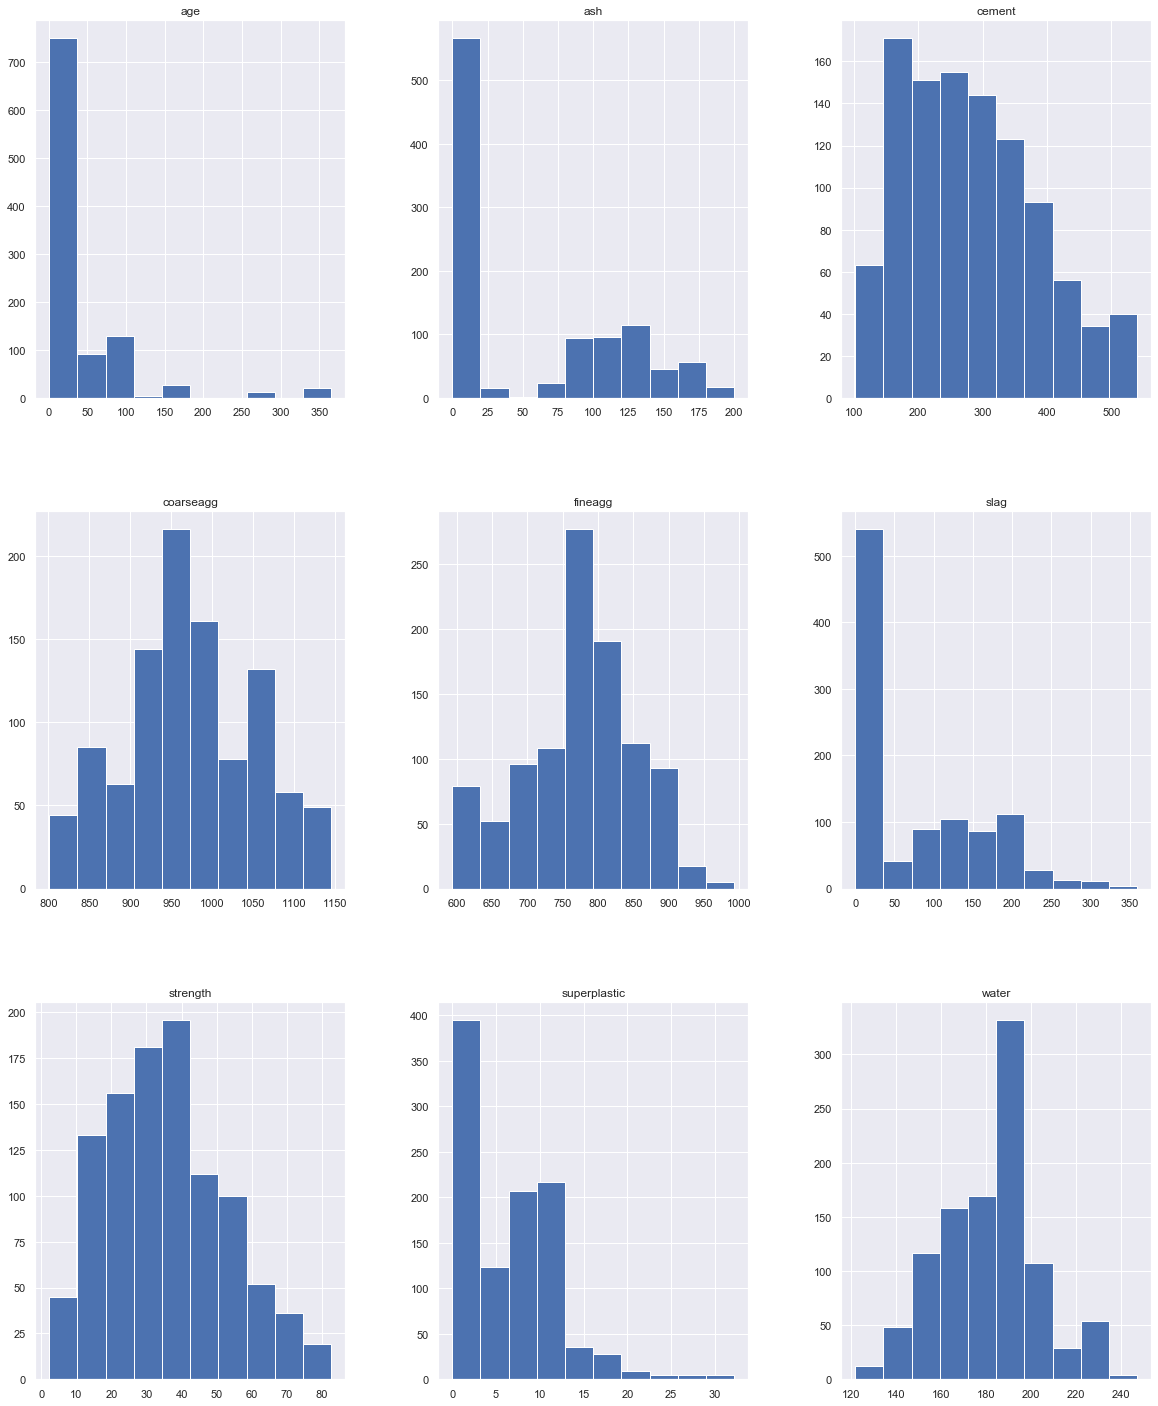

In [7]:
Concrete_df.hist(figsize=(20,25))

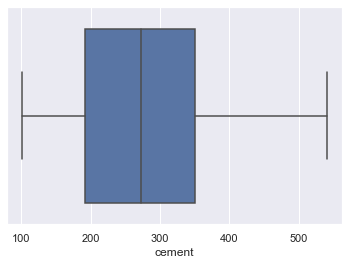

In [8]:
sns.boxplot(Concrete_df['cement'])

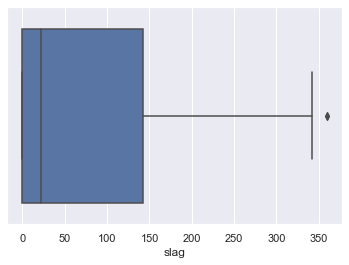

In [9]:
sns.boxplot(Concrete_df['slag'])

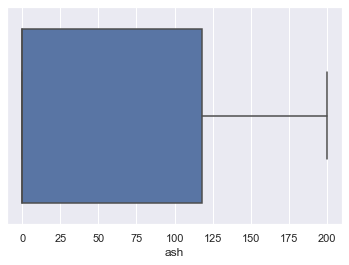

In [10]:
sns.boxplot(Concrete_df['ash'])

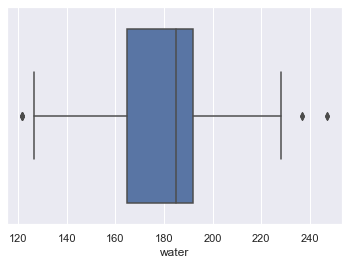

In [11]:
sns.boxplot(Concrete_df['water'])

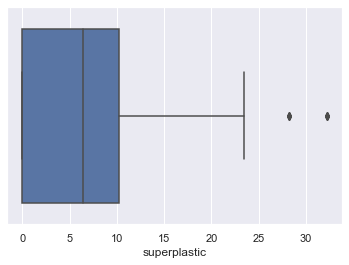

In [12]:
sns.boxplot(Concrete_df['superplastic'])

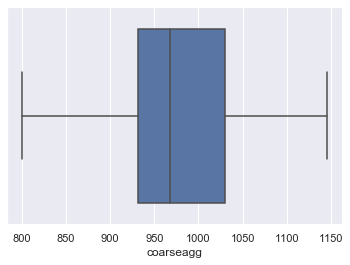

In [13]:
sns.boxplot(Concrete_df['coarseagg'])

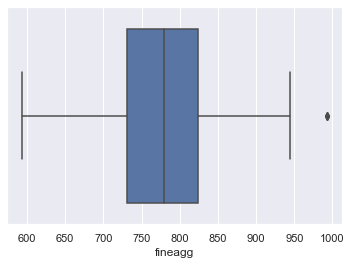

In [14]:
sns.boxplot(Concrete_df['fineagg'])

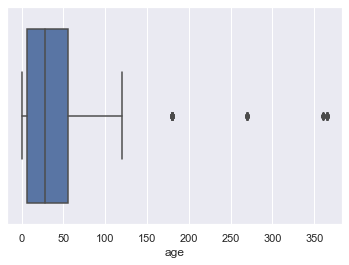

In [15]:
sns.boxplot(Concrete_df['age'])

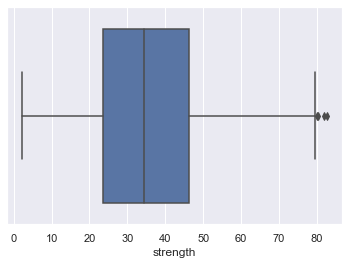

In [16]:
sns.boxplot(Concrete_df['strength'])

##### Analyze zero values 

In [17]:
print((Concrete_df[['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']]==0).sum())

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64


##### Zero value analysis - Conclusion 

1. slag, ash and superplastic can theoretically have zero values based on domain understanding. This is because,
these are not essential components of concrete, they are added based on the end application of concrete. 

2. The zero values in these three columns are non-co-occurring, which points that these zero values 
would not be due to oversight, but actual values. 

3. Through manual filtering of the csv file, it was observed that the sum of all the components of concrete 
is more or less constant, in the range of 2200 to 2400. If the zero values were due to missing values, the sum of 
components may have differed, and would have been especially less where these columns had zero values. But that is 
not the case. 

Due to these reasons, it is assumed that zero values are valid, and there will be no replacement for zero values. 


### Observations from Univariate Analysis 

1. cement

a. Histogram shows near normal distribution with a tail on right side. 

b. Box plot shows there are no outliers. 


2. slag

a. Histogram indicates very high number of zero values. Non-zero values are well distributed, with a slight tail
on the right side. 

b. Box plot shows outliers are placed just outside the upper limit, do not indicate an anomaly.  


3. ash

a. Histogram indicates very high number of zero values. Non-zero values are well distributed. 

b. Box plot shows there are no outliers. 


4. water

a. Histogram shows near normal distribution. 

b. Box plot shows very few outliers on both sides, but do not indicate an anomaly. 


5. superplastic

a. Histogram indicates very high number of zero values. Non-zero values are well distributed, with a slight tail
on the right side. But this is not a problem, because superplasticizer may not be used in several instances. 

b. Box plot shows few outliers on higher side. 


6. coarseagg

a. Histogram shows a normal distribution.

b. Box plot shows there are no outliers.


7. fineagg

a. Histogram shows near normal distribution.

b. Box plot shows few outliers on higher side. 


8. age

a. Histogram indicates long tail on the right. However, that is due to the fact that concrete strength data 
is collected at age of upto 28 days, then at ages of 6 months, 9 months and 1 year. 

b. Box plot shows outliers on higher side. But it is not an anomaly, it is due to the fact that concrete 
strength data is collected at age of upto 28 days, then at ages of 6 months, 9 months and 1 year. 


9. strength

a. Histogram shows near normal distribution, with slightly higher number of lower range values. 

b. Box plot shows few outliers on higher side. 



## Multivariate Analysis 

##### Pair Plot Analysis 

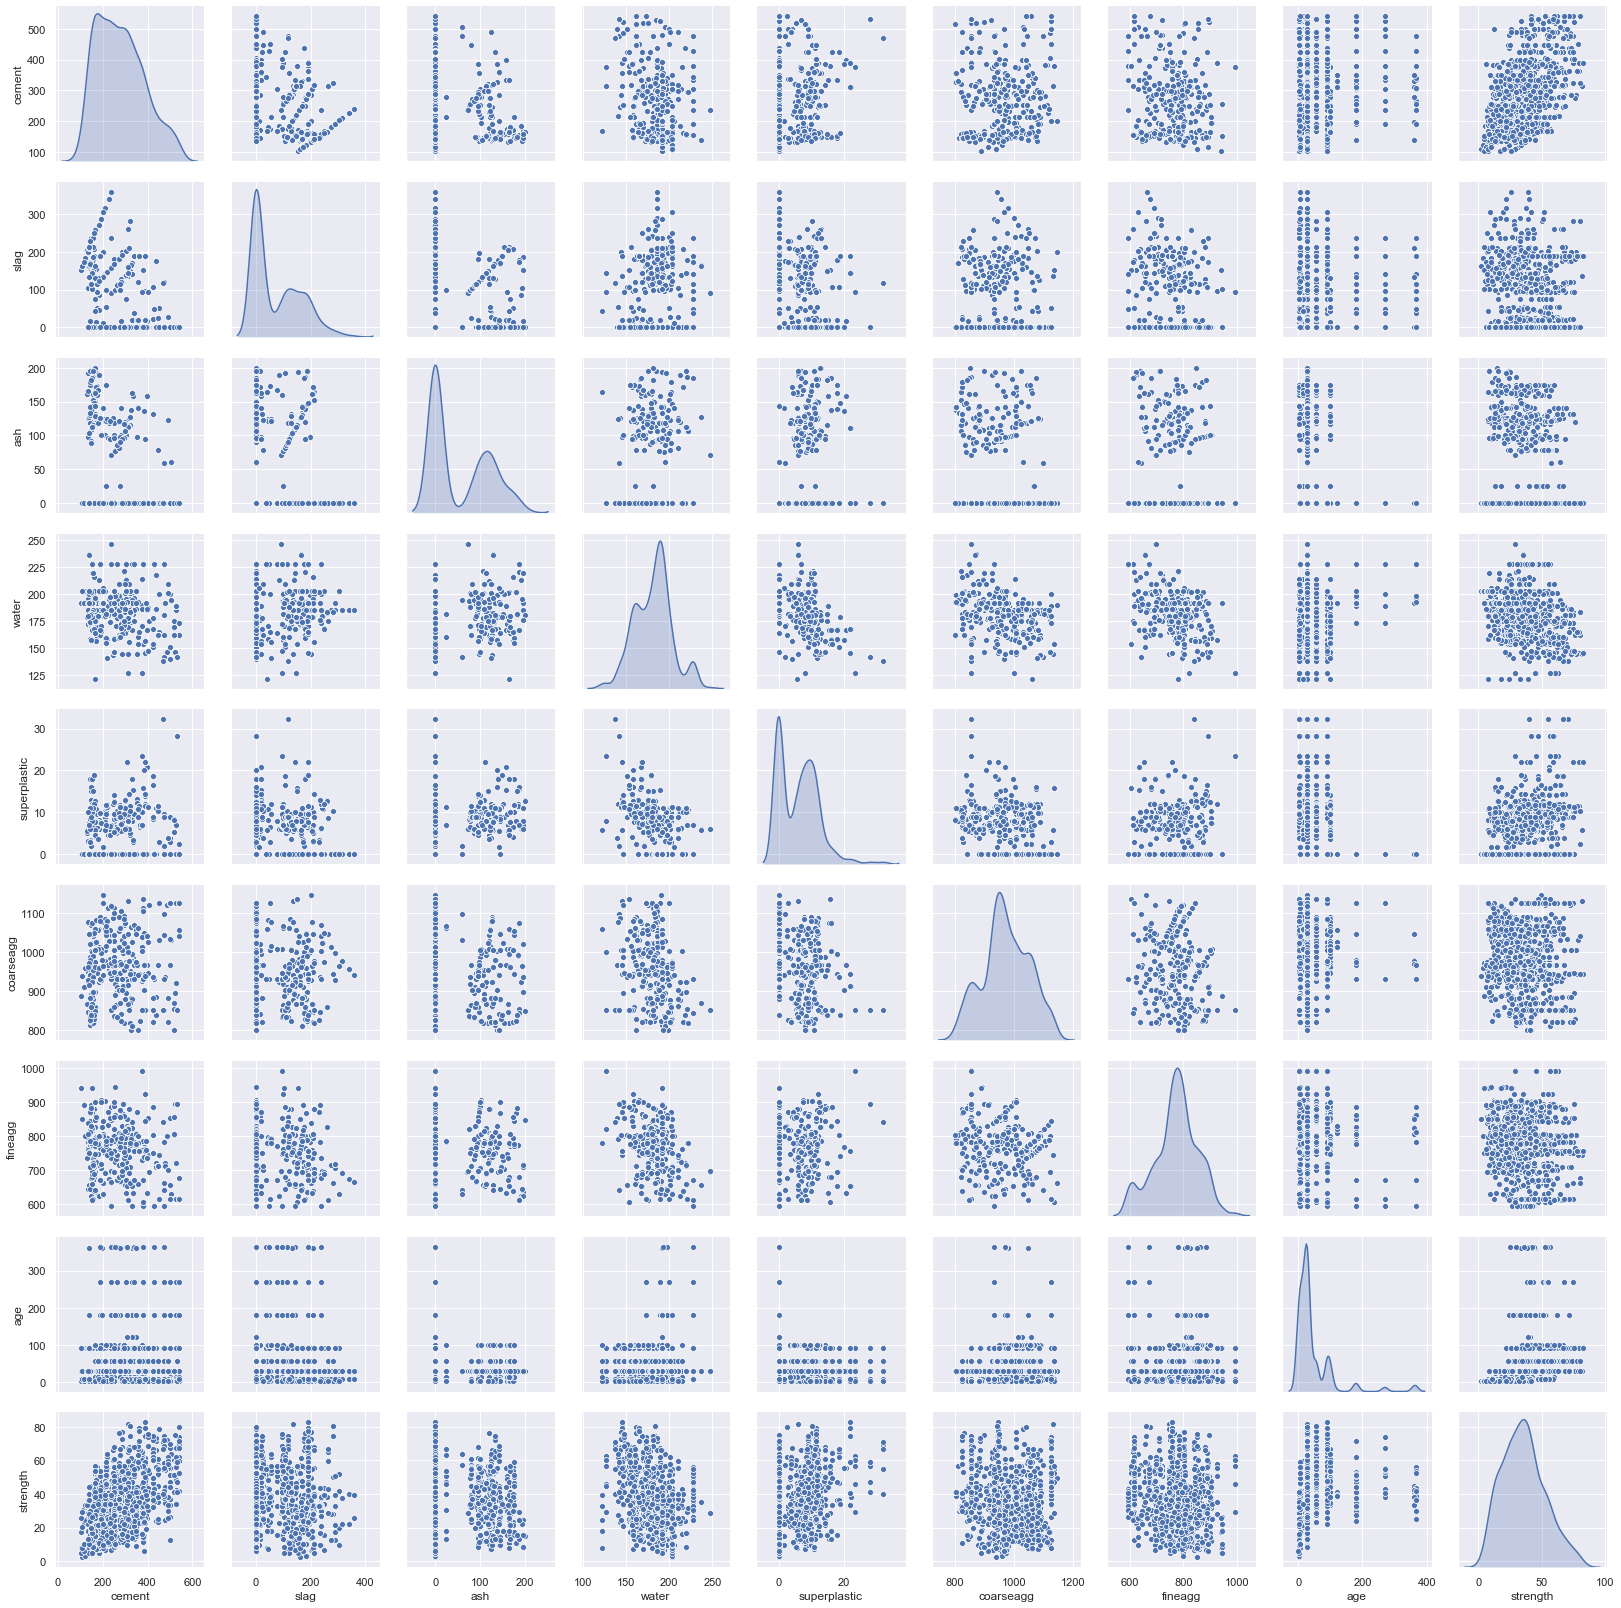

In [18]:
sns.pairplot(Concrete_df,diag_kind='kde') 

##### Correlation Analysis

In [19]:
corr = Concrete_df.corr()
corr

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water        -0.450661  0.277618 -0.289633  
superplastic  0.222691 -0.192700  0.366079  
coarseagg    -0.178481 -0.003016 -0.164935  
fineagg       1.000000 -0.156095 -0.167241  
age          -0.156095  1.000000  0.328873  
strength     -0.167241  0.328873  1.000000

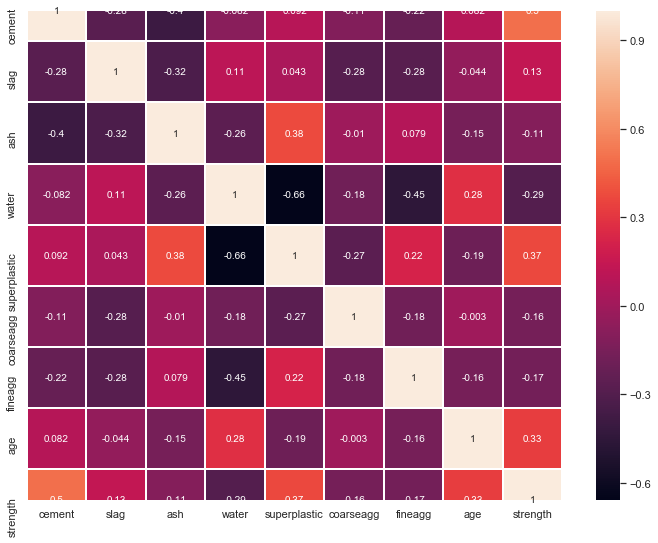

In [20]:
# Plot correlation heat map for better visualisation 
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True,linewidths=1)

## Inference from Pairplot and Correlation Analysis

1. Strength has positive correlation with cement, superplastic and age. 

2. Strength has negative correlation with water. 

3. Cement has negative correlation with slag and ash, because they are used as replacement of cement. 

4. Cement has weak correlation with water. However, since strength has positive correlation with cement, 
and negative correlation with water, it will be useful to consider another attribute that has ratio of 
cement and water. 

5. Slag has negative correlation with ash and aggregators. 

6. Ash has negative correlation with almost all other attributes, except superplastic. 

7. Water has very strong negative correlation with superplastic and fine aggregator. 

8. Superplastic has strong correlation with ash 

9. Coarse aggregator has negative correlation with all other attributes. 

10. Age has weak correlation with almost all attributes. 



## Strategies for addressing data challenges 


1. Data pollution / zero values - 

a. slag, ash and superplastic can theoretically have zero values based on domain understanding. This is because,
these are not essential components of concrete, they are added based on the end application of concrete. 

b. The zero values in these three columns are non-co-occurring, which points that these zero values 
would not be due to oversight, but actual values. 

c. Through manual filtering of the csv file, it was observed that the sum of all the components of concrete 
is more or less constant, in the range of 2200 to 2500. If the zero values were due to missing values, the sum of 
components may have differed, and would have been especially less where these columns had zero values. But that is 
not the case. 

Due to these reasons, it is assumed that zero values are valid, and there will be no replacement for zero values. 

2. Outliers - There are very few outliers for slag, water, superplastic, fineagg and age. However, they do not seem
like anomaly. 

3. Missing values - There are no missing values.


## Feature Engineering 

##### Normalization and composite features 

1. Transformation - Since the range for age is very big, log transformation can be used. 

2. Composite features - following additional ratios can be considered based on domain understanding - 

a. Water / cement ratio 

b. Coarse / fine aggregate ratio

c. Aggregate / cement Ratio

d. Ash / cement ratio 

e. Slag / cement ratio


##### Log transformation for age attribute 

In [21]:
Concrete_df['age_log'] = boxcox(Concrete_df['age'], 0.0)

In [22]:
Concrete_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength   age_log  
0     29.89  3.332205  
1     23.51  2.639057  
2     29.22  3.332205  
3     45.85  3.332205  
4     18.29  3.332205

#### Add new composite columns 

In [23]:
# Water / cement ratio 
Concrete_df['water_cement'] = Concrete_df['water'] / Concrete_df['cement']

In [24]:
# Coarse / fine aggregate ratio
Concrete_df['coarse_fine'] = Concrete_df['coarseagg'] / Concrete_df['fineagg']

In [25]:
# Aggregate / cement Ratio
Concrete_df['agg_cement'] = (Concrete_df['coarseagg'] + Concrete_df['fineagg'] ) / Concrete_df['cement']

In [26]:
# Ash / cement ratio 
Concrete_df['ash_cement'] = Concrete_df['ash'] / Concrete_df['cement']

In [27]:
# Slag / cement ratio
Concrete_df['slag_cement'] = Concrete_df['slag'] / Concrete_df['cement']

In [28]:
# Superplastic / cement ratio
Concrete_df['Superp_cement'] = Concrete_df['superplastic'] / Concrete_df['cement']

In [29]:
Concrete_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength   age_log  water_cement  coarse_fine  agg_cement  ash_cement  \
0     29.89  3.332205      1.440198     1.298330   12.174805    0.000000   
1     23.51  2.639057      0.937241     1.357448   11.113085    0.735938   
2     29.22  3.332205      0.749600     1.111124    7.272400    0.382800   
3     45.85  3.332205      0.857143     1.391045    6.022556    0.000000   
4     18.29  3.332205      1.248708     1.503373   11.266796    0.000000   

   slag_cement  Superp_cement  
0     1.500354       0.000000  
1     0.249852       0.063943  
2     0.000000       0.022000  
3     0.428571       0.000000  
4     1.184755       0.058786

#### Pair Plot Analysis after adding new features 

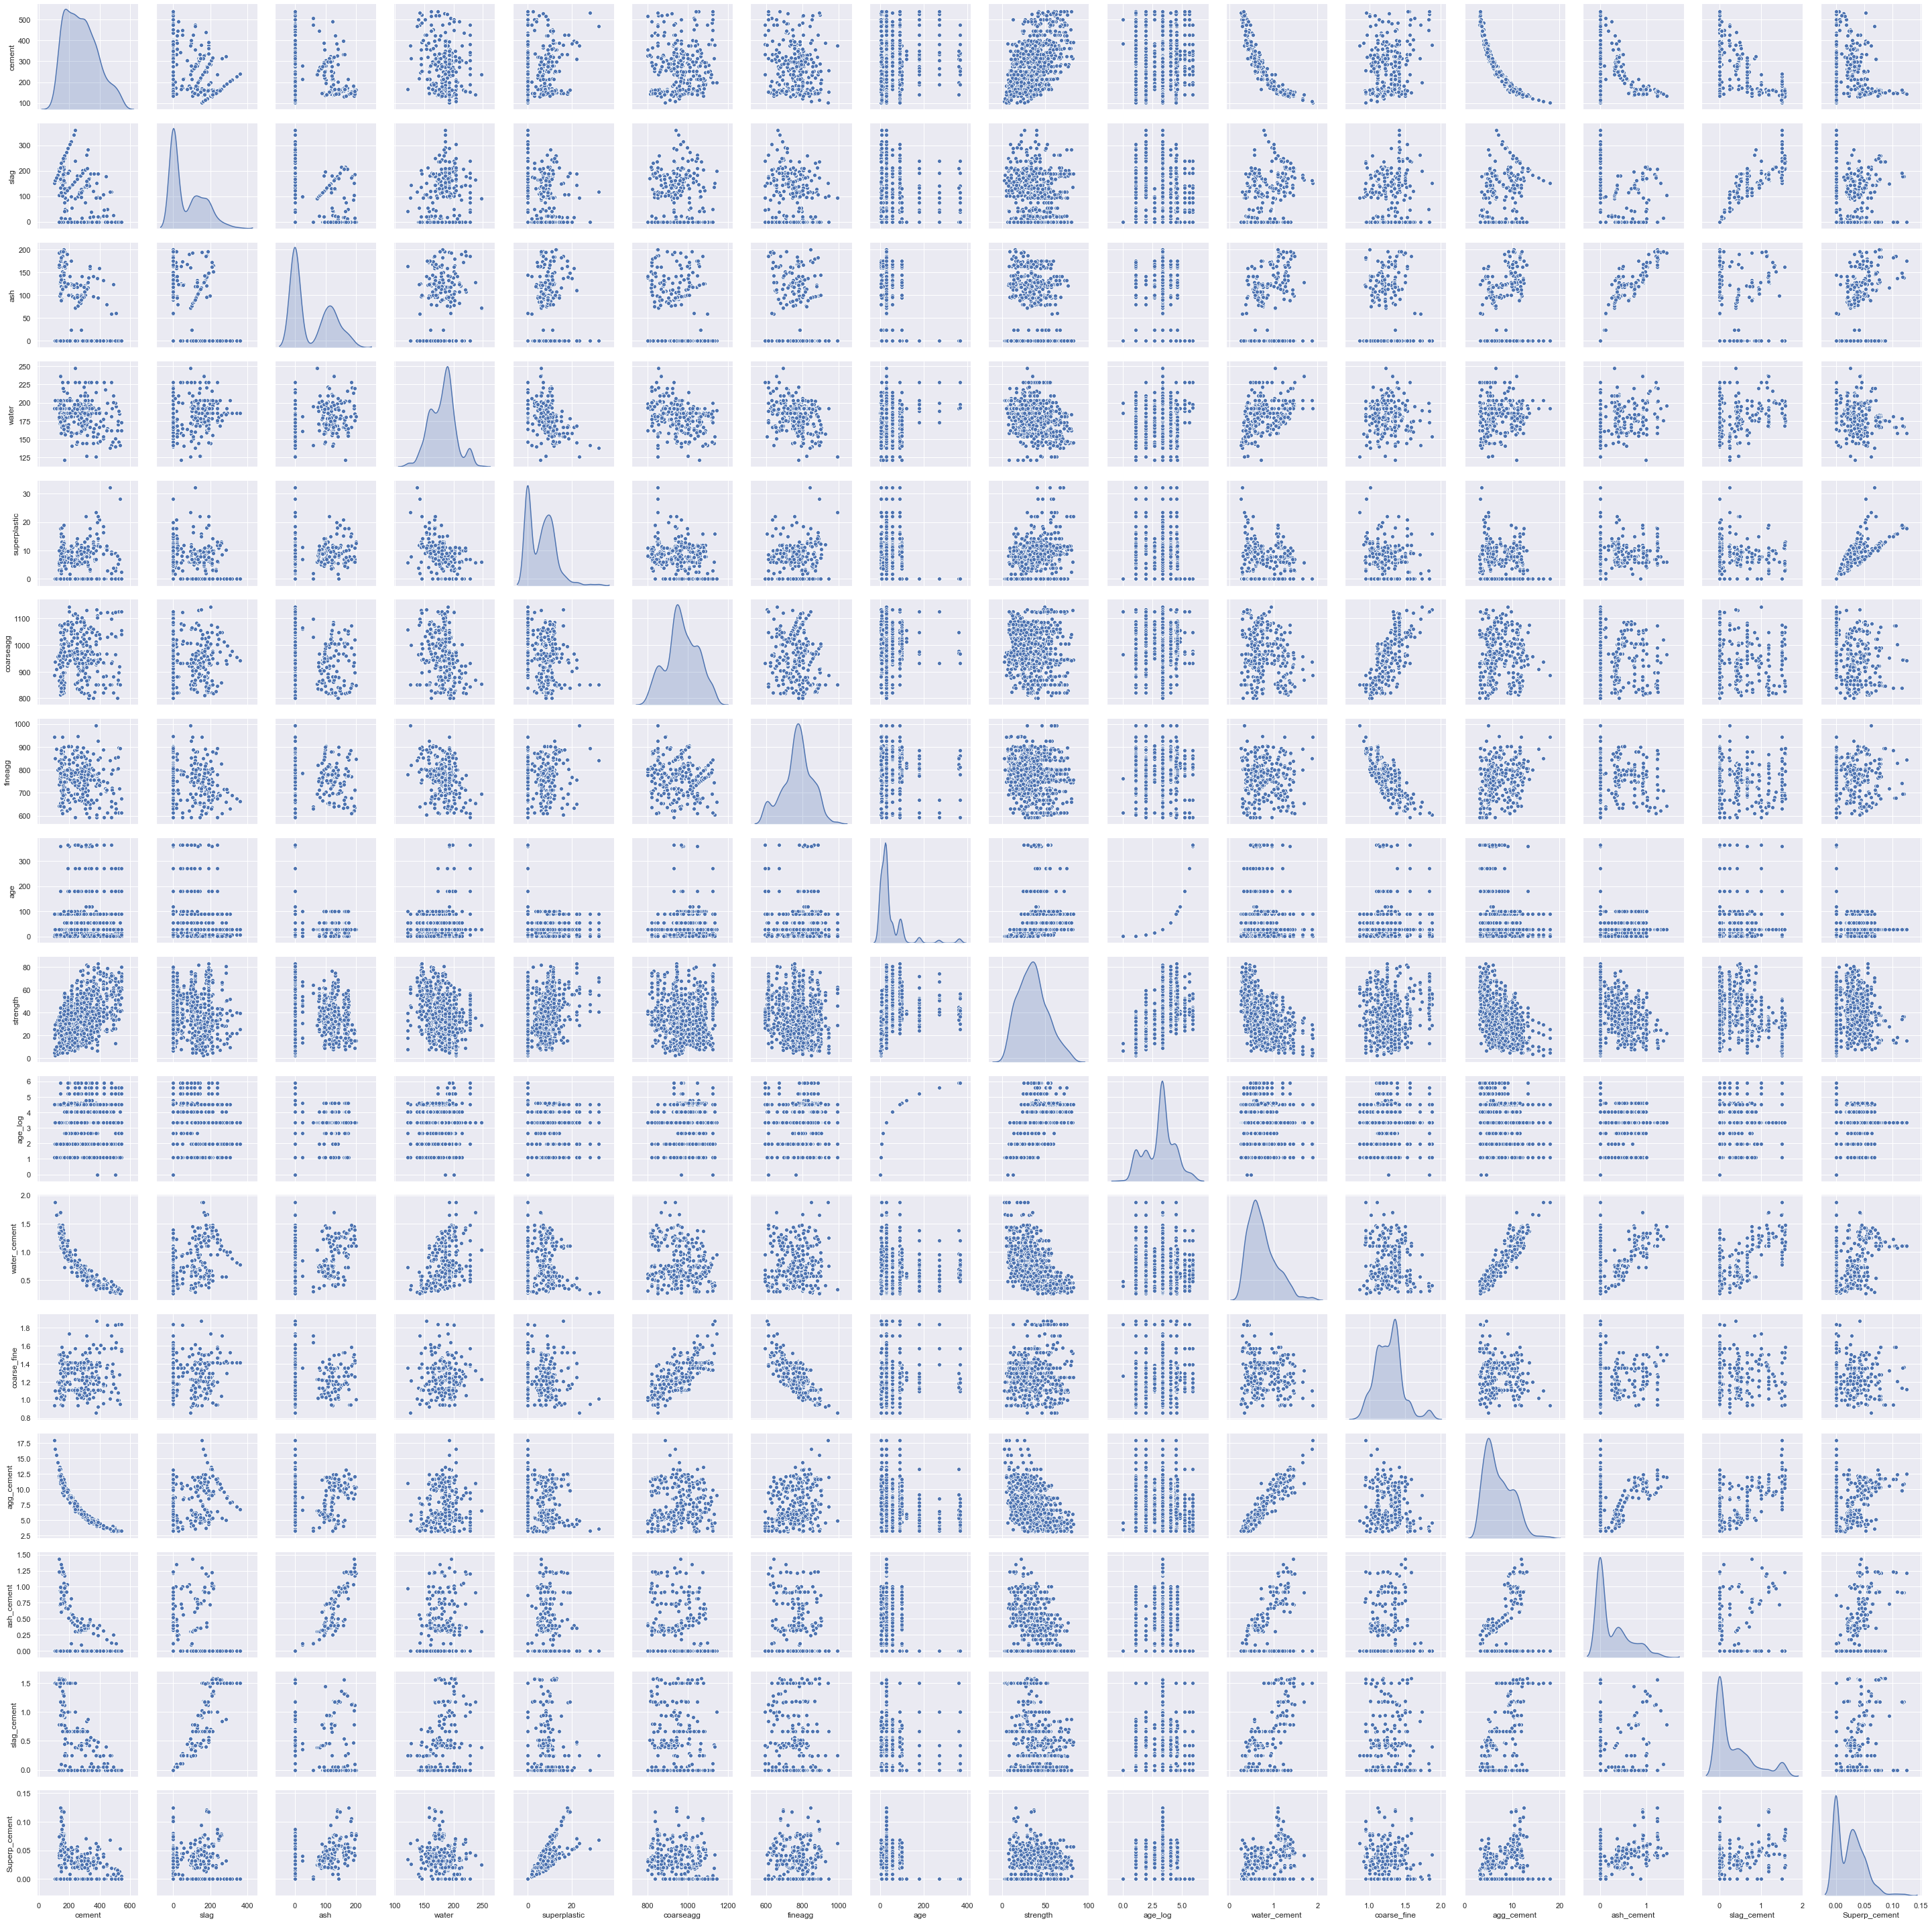

In [30]:
sns.pairplot(Concrete_df,diag_kind='kde') 

In [31]:
corr = Concrete_df.corr()
corr

cement      slag       ash     water  superplastic  \
cement         1.000000 -0.275216 -0.397467 -0.081587      0.092386   
slag          -0.275216  1.000000 -0.323580  0.107252      0.043270   
ash           -0.397467 -0.323580  1.000000 -0.256984      0.377503   
water         -0.081587  0.107252 -0.256984  1.000000     -0.657533   
superplastic   0.092386  0.043270  0.377503 -0.657533      1.000000   
coarseagg     -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   
fineagg       -0.222718 -0.281603  0.079108 -0.450661      0.222691   
age            0.081946 -0.044246 -0.154371  0.277618     -0.192700   
strength       0.497832  0.134829 -0.105755 -0.289633      0.366079   
age_log       -0.001688 -0.017805 -0.014294  0.165943     -0.042885   
water_cement  -0.879130  0.357322  0.246004  0.332968     -0.223215   
coarse_fine    0.144226  0.054375 -0.099457  0.229285     -0.302406   
agg_cement    -0.922534  0.240343  0.351127  0.009320     -0.083592   
ash_cement    -0.517164 -0.223945  0.940649 -0.210720      0.322097   
slag_cement   -0.487476  0.904555 -0.212466  0.187276     -0.081383   
Superp_cement -0.296392  0.049354  0.605615 -0.512831      0.836010   

               coarseagg   fineagg       age  strength   age_log  \
cement         -0.109349 -0.222718  0.081946  0.497832 -0.001688   
slag           -0.283999 -0.281603 -0.044246  0.134829 -0.017805   
ash            -0.009961  0.079108 -0.154371 -0.105755 -0.014294   
water          -0.182294 -0.450661  0.277618 -0.289633  0.165943   
superplastic   -0.265999  0.222691 -0.192700  0.366079 -0.042885   
coarseagg       1.000000 -0.178481 -0.003016 -0.164935 -0.040159   
fineagg        -0.178481  1.000000 -0.156095 -0.167241 -0.113917   
age            -0.003016 -0.156095  1.000000  0.328873  0.763490   
strength       -0.164935 -0.167241  0.328873  1.000000  0.552180   
age_log        -0.040159 -0.113917  0.763490  0.552180  1.000000   
water_cement   -0.034255  0.066595 -0.029268 -0.500692  0.024720   
coarse_fine     0.670902 -0.835861  0.131635  0.049028  0.069792   
agg_cement      0.135076  0.267836 -0.103339 -0.484489 -0.024559   
ash_cement      0.020343  0.065059 -0.133307 -0.181980  0.008612   
slag_cement    -0.221187 -0.191686 -0.056082 -0.069018 -0.019504   
Superp_cement  -0.139361  0.166813 -0.192095  0.115235 -0.003244   

               water_cement  coarse_fine  agg_cement  ash_cement  slag_cement  \
cement            -0.879130     0.144226   -0.922534   -0.517164    -0.487476   
slag               0.357322     0.054375    0.240343   -0.223945     0.904555   
ash                0.246004    -0.099457    0.351127    0.940649    -0.212466   
water              0.332968     0.229285    0.009320   -0.210720     0.187276   
superplastic      -0.223215    -0.302406   -0.083592    0.322097    -0.081383   
coarseagg         -0.034255     0.670902    0.135076    0.020343    -0.221187   
fineagg            0.066595    -0.835861    0.267836    0.065059    -0.191686   
age               -0.029268     0.131635   -0.103339   -0.133307    -0.056082   
strength          -0.500692     0.049028   -0.484489   -0.181980    -0.069018   
age_log            0.024720     0.069792   -0.024559    0.008612    -0.019504   
water_cement       1.000000    -0.086906    0.928366    0.401401     0.641140   
coarse_fine       -0.086906     1.000000   -0.144786   -0.067278     0.018300   
agg_cement         0.928366    -0.144786    1.000000    0.497115     0.524968   
ash_cement         0.401401    -0.067278    0.497115    1.000000    -0.095953   
slag_cement        0.641140     0.018300    0.524968   -0.095953     1.000000   
Superp_cement      0.154568    -0.206910    0.293778    0.643565     0.050754   

               Superp_cement  
cement             -0.296392  
slag                0.049354  
ash                 0.605615  
water              -0.512831  
superplastic        0.836010  
coarseagg          -0.139361  
fineagg             0.166813  
age                -0.1920

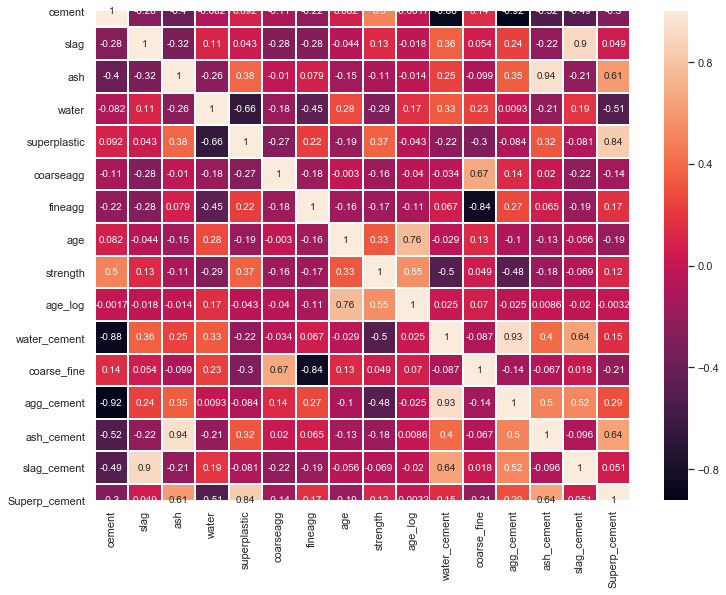

In [32]:
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True,linewidths=1)

#### Reassessment of predictors after adding composite features 

##### Following attributes can be dropped due to their relatively weak correlation with strength 
1. slag 
2. ash 
3. coarse_fine
4. slag_cement
5. superp_cement  

In [33]:
Concrete_df_new = Concrete_df
Concrete_df_new.drop(columns='slag',axis=1, inplace=True)
Concrete_df_new.drop(columns='ash',axis=1, inplace=True)
Concrete_df_new.drop(columns='coarse_fine',axis=1, inplace=True)
Concrete_df_new.drop(columns='slag_cement',axis=1, inplace=True)
Concrete_df_new.drop(columns='Superp_cement',axis=1, inplace=True)
# Concrete_df_new.drop(columns='age',axis=1, inplace=True) 
# A drop in accuracy was noticed after dropping 'age', so it is kept along with age_log attribute. 

In [34]:
Concrete_df_new.head()

cement  water  superplastic  coarseagg  fineagg  age  strength   age_log  \
0   141.3  203.5           0.0      971.8    748.5   28     29.89  3.332205   
1   168.9  158.3          10.8     1080.8    796.2   14     23.51  2.639057   
2   250.0  187.4           5.5      956.9    861.2   28     29.22  3.332205   
3   266.0  228.0           0.0      932.0    670.0   28     45.85  3.332205   
4   154.8  193.3           9.1     1047.4    696.7   28     18.29  3.332205   

   water_cement  agg_cement  ash_cement  
0      1.440198   12.174805    0.000000  
1      0.937241   11.113085    0.735938  
2      0.749600    7.272400    0.382800  
3      0.857143    6.022556    0.000000  
4      1.248708   11.266796    0.000000

#### Complexity of the model 

Higher degree modelling can be employed if the accuracy is low, as some of the attributes 
have slight curvilinearity. 

## Exploring Gaussians 

Multivariate analysis and Pairplot indicates two Gaussians for most attributes, and 5 for age. 

##### K-Means clustering and elbow method to find optimum number of clusters 

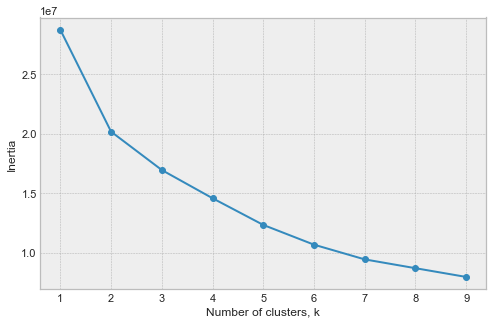

In [35]:
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(Concrete_df_new.drop('strength',axis=1))
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

##### Clustering analysis 

By applying elbow method, it seems optimum number of clusters is two. 

##### Split the dataset into attributes and class

In [36]:
Concrete_df_new_y = Concrete_df_new["strength"]

In [37]:
Concrete_df_new_X = Concrete_df_new[Concrete_df_new.columns[0:11]]
Concrete_df_new_X.drop(columns='strength',axis=1, inplace=True)

In [38]:
Concrete_df_new_X.head()

cement  water  superplastic  coarseagg  fineagg  age   age_log  \
0   141.3  203.5           0.0      971.8    748.5   28  3.332205   
1   168.9  158.3          10.8     1080.8    796.2   14  2.639057   
2   250.0  187.4           5.5      956.9    861.2   28  3.332205   
3   266.0  228.0           0.0      932.0    670.0   28  3.332205   
4   154.8  193.3           9.1     1047.4    696.7   28  3.332205   

   water_cement  agg_cement  ash_cement  
0      1.440198   12.174805    0.000000  
1      0.937241   11.113085    0.735938  
2      0.749600    7.272400    0.382800  
3      0.857143    6.022556    0.000000  
4      1.248708   11.266796    0.000000

##### Apply standardization 

Use Z scaler to standardize values 

In [39]:
sc = StandardScaler()
X_std =  sc.fit_transform(Concrete_df_new_X)

In [40]:
Concrete_df_new_y.head()

0    29.89
1    23.51
2    29.22
3    45.85
4    18.29
Name: strength, dtype: float64

In [41]:
X_std_df = pd.DataFrame(X_std)

## Model Building, Tuning and Feature Importance

##### Training & Test Split

In [42]:
test_size = 0.20 # 80:20 training and test set
seed = 365  
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std_df, Concrete_df_new_y, test_size=test_size, random_state=seed)

##### Linear Regression model 

In [43]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
        print("The coefficient for {} is {}".format(col_name, reg.coef_[idx]))

The coefficient for 0 is 3.303023110506112
The coefficient for 1 is -10.812646999444409
The coefficient for 2 is 0.4956962752380089
The coefficient for 3 is -3.534192789147661
The coefficient for 4 is -5.171435325783633
The coefficient for 5 is -2.708637335307537
The coefficient for 6 is 11.886182753412845
The coefficient for 7 is 5.273624535578876
The coefficient for 8 is -6.873036694802464
The coefficient for 9 is -2.611184193084423


In [45]:
reg.score(X_train, y_train)

0.7928045769555672

In [46]:
reg.score(X_test, y_test)

0.7640218912848987

In [47]:
y_pred_reg = reg.predict(X_test)

In [48]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res


In [49]:
mape = np.mean(np.abs(percentage_error(np.asarray(y_test), np.asarray(y_pred_reg)))) * 100
vs = explained_variance_score(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)
mse = mean_squared_error(y_test, y_pred_reg)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred_reg)

print('MAPE:%f%%' % mape)
print('Explained Variance Score:%f' % vs)
print('MAE:%f' % mae)
print('MSE:%f' % mse)
print('RMSE:%f' % rmse)
print('R2:%f' % r2) 

MAPE:21.610636%
Explained Variance Score:0.765117
MAE:6.360553
MSE:62.100185
RMSE:7.880367
R2:0.764022


##### XGB Model 

In [50]:
xgbmodel = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 20, n_estimators = 100)

In [51]:
xgbmodel.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [52]:
y_pred_xgbmodel = xgbmodel.predict(X_test)
mape = np.mean(np.abs(percentage_error(np.asarray(y_test), np.asarray(y_pred_xgbmodel)))) * 100
print('MAPE:%f%%' % mape)

vs = explained_variance_score(y_test, y_pred_xgbmodel)
mae = mean_absolute_error(y_test, y_pred_xgbmodel)
mse = mean_squared_error(y_test, y_pred_xgbmodel)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred_xgbmodel)

print('Explained Variance Score:%f' % vs)
print('MAE:%f' % mae)
print('MSE:%f' % mse)
print('RMSE:%f' % rmse)
print('R2:%f' % r2) 

MAPE:8.607871%
Explained Variance Score:0.935178
MAE:2.559779
MSE:17.241929
RMSE:4.152340
R2:0.934481


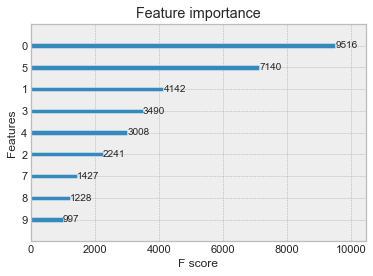

In [53]:
xgb.plot_importance(xgbmodel)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

##### XGB Grid Search Coarse

In [54]:
param_grid = [    {'n_estimators': [40, 100, 160, 220, 280], 
                   'learning_rate': [0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25, 0.5], 
                   'max_depth': [10, 15, 20, 25, 30], 
                   'objective': ['reg:squarederror']}    ]

In [55]:
xgbgrid = GridSearchCV(xgb.XGBRegressor(), param_grid, refit=True, verbose=3)
xgbgrid.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 225 candidates, totalling 675 fits
[CV] learning_rate=0.05, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.773, total=   0.1s
[CV] learning_rate=0.05, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.720, total=   0.1s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.05, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.744, total=   0.1s
[CV] learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.898, total=   0.2s
[CV] learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.885, total=   0.2s
[CV] learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.890, total=   0.2s
[CV] learning_rate=0.05, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.901, total=   0.3s
[CV] learning_rate=0.05, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.887, total=   0.3s
[CV] learning_rate=0.05, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.897, total=   0.3s
[CV] learning_rate=0.05, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.901, total=   0.4s
[CV] learning_rate=0.05, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.887, total=   0.4s
[CV] learning_rate=0.05, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.05, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.901, total=   0.5s
[CV] learning_rate=0.05, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.887, total=   0.5s
[CV] learning_rate=0.05, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.05, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.774, total=   0.1s
[CV] learning_rate=0.05, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.724, total=   0.1s
[CV] learning_rate=0.05, max_depth=15, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.745, total=   0.1s
[CV] learning_rate=0.05, max_depth=15, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.902, total=   0.2s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.05, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.886, total=   0.2s
[CV] learning_rate=0.05, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.893, total=   0.2s
[CV] learning_rate=0.05, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.904, total=   0.4s
[CV] learning_rate=0.05, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.889, total=   0.4s
[CV] learning_rate=0.05, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.898, total=   0.4s
[CV] learning_rate=0.05, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.05, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.05, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.899, total=   0.5s
[CV] learning_rate=0.05, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.904, total=   0.7s
[CV] learning_rate=0.05, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.889, total=   0.7s
[CV] learning_rate=0.05, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.7s
[CV] learning_rate=0.05, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.774, total=   0.1s
[CV] learning_rate=0.05, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.724, total=   0.1s
[CV] learning_rate=0.05, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.746, total=   0.1s
[CV] learning_rate=0.05, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.902, total=   0.2s
[CV] learning_rate=0.05, max_depth=20, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.885, total=   0.2s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.05, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.894, total=   0.2s
[CV] learning_rate=0.05, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.904, total=   0.4s
[CV] learning_rate=0.05, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.888, total=   0.4s
[CV] learning_rate=0.05, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.05, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.904, total=   0.6s
[CV] learning_rate=0.05, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.05, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.900, total=   0.6s
[CV] learning_rate=0.05, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.904, total=   0.8s
[CV] learning_rate=0.05, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.888, total=   0.8s
[CV] learning_rate=0.05, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.900, total=   0.8s
[CV] learning_rate=0.05, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.774, total=   0.1s
[CV] learning_rate=0.05, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.724, total=   0.1s
[CV] learning_rate=0.05, max_depth=25, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.746, total=   0.1s
[CV] learning_rate=0.05, max_depth=25, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.902, total=   0.2s
[CV] learning_rate=0.05, max_depth=25, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.885, total=   0.2s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.05, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.894, total=   0.2s
[CV] learning_rate=0.05, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.904, total=   0.4s
[CV] learning_rate=0.05, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.888, total=   0.4s
[CV] learning_rate=0.05, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.05, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.904, total=   0.6s
[CV] learning_rate=0.05, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.05, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.900, total=   0.6s
[CV] learning_rate=0.05, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.903, total=   0.8s
[CV] learning_rate=0.05, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.888, total=   0.8s
[CV] learning_rate=0.05, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.900, total=   0.8s
[CV] learning_rate=0.05, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.774, total=   0.1s
[CV] learning_rate=0.05, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.05, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.724, total=   0.1s
[CV] learning_rate=0.05, max_depth=30, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.746, total=   0.1s
[CV] learning_rate=0.05, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.902, total=   0.2s
[CV] learning_rate=0.05, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.885, total=   0.2s
[CV] learning_rate=0.05, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.894, total=   0.2s
[CV] learning_rate=0.05, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.904, total=   0.4s
[CV] learning_rate=0.05, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.888, total=   0.4s
[CV] learning_rate=0.05, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.05, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.904, total=   0.6s
[CV] learning_rate=0.05, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.05, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.900, total=   0.6s
[CV] learning_rate=0.05, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.903, total=   0.8s
[CV] learning_rate=0.05, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.888, total=   0.8s
[CV] learning_rate=0.05, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.05, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.900, total=   0.8s
[CV] learning_rate=0.075, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.075, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.870, total=   0.1s
[CV] learning_rate=0.075, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.075, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.858, total=   0.1s
[CV] learning_rate=0.075, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.075, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.858, total=   0.1s
[CV] learning_rate=0.075, max_depth=10, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.897, total=   0.2s
[CV] learning_rate=0.075, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.075, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.890, total=   0.2s
[CV] learning_rate=0.075, max_depth=10, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.897, total=   0.2s
[CV] learning_rate=0.075, max_depth=10, n_estimators=160, objective=reg:squarederror 
[CV]  learning_rate=0.075, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.898, total=   0.3s
[CV] learning_rate=0.075, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.890, total=   0.3s
[CV] learning_rate=0.075, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.075, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.898, total=   0.4s
[CV] learning_rate=0.075, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.075, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.075, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.075, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.890, total=   0.5s
[CV] learning_rate=0.075, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.5s
[CV] learning_rate=0.075, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.075, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.875, total=   0.1s
[CV] learning_rate=0.075, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.075, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.856, total=   0.1s
[CV] learning_rate=0.075, max_depth=15, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.863, total=   0.1s
[CV] learning_rate=0.075, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.897, total=   0.2s
[CV] learning_rate=0.075, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.889, total=   0.2s
[CV] learning_rate=0.075, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.898, total=   0.2s
[CV] learning_rate=0.075, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.075, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.075, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.075, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.897, total=   0.5s
[CV] learning_rate=0.075, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.890, total=   0.6s
[CV] learning_rate=0.075, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.899, total=   0.5s
[CV] learning_rate=0.075, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.075, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.890, total=   0.6s
[CV] learning_rate=0.075, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.7s
[CV] learning_rate=0.075, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.075, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.875, total=   0.1s
[CV] learning_rate=0.075, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.075, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.858, total=   0.1s
[CV] learning_rate=0.075, max_depth=20, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.863, total=   0.1s
[CV] learning_rate=0.075, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.075, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.891, total=   0.3s
[CV] learning_rate=0.075, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.898, total=   0.3s
[CV] learning_rate=0.075, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.5s
[CV] learning_rate=0.075, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.892, total=   0.5s
[CV] learning_rate=0.075, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.5s
[CV] learning_rate=0.075, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.899, total=   0.6s
[CV] learning_rate=0.075, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.892, total=   0.6s
[CV] learning_rate=0.075, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.899, total=   0.6s
[CV] learning_rate=0.075, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.7s
[CV] learning_rate=0.075, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.892, total=   0.7s
[CV] learning_rate=0.075, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.7s
[CV] learning_rate=0.075, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.075, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.875, total=   0.1s
[CV] learning_rate=0.075, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.075, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.858, total=   0.1s
[CV] learning_rate=0.075, max_depth=25, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.863, total=   0.1s
[CV] learning_rate=0.075, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.075, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.892, total=   0.3s
[CV] learning_rate=0.075, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.898, total=   0.3s
[CV] learning_rate=0.075, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.075, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.892, total=   0.6s
[CV] learning_rate=0.075, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.5s
[CV] learning_rate=0.075, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.898, total=   0.7s
[CV] learning_rate=0.075, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.892, total=   0.6s
[CV] learning_rate=0.075, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.899, total=   0.7s
[CV] learning_rate=0.075, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.898, total=   0.7s
[CV] learning_rate=0.075, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.892, total=   0.7s
[CV] learning_rate=0.075, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.7s
[CV] learning_rate=0.075, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.075, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.875, total=   0.1s
[CV] learning_rate=0.075, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.075, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.858, total=   0.1s
[CV] learning_rate=0.075, max_depth=30, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.863, total=   0.1s
[CV] learning_rate=0.075, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.075, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.892, total=   0.3s
[CV] learning_rate=0.075, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.898, total=   0.3s
[CV] learning_rate=0.075, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.075, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.892, total=   0.5s
[CV] learning_rate=0.075, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.5s
[CV] learning_rate=0.075, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.898, total=   0.7s
[CV] learning_rate=0.075, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.892, total=   0.7s
[CV] learning_rate=0.075, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.899, total=   0.7s
[CV] learning_rate=0.075, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.898, total=   0.8s
[CV] learning_rate=0.075, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.892, total=   0.8s
[CV] learning_rate=0.075, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.075, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.1, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.898, total=   0.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.1, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.883, total=   0.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.884, total=   0.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.906, total=   0.2s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.1, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.891, total=   0.2s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.1, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.1, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.896, total=   0.2s
[CV] learning_rate=0.1, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.906, total=   0.3s
[CV] learning_rate=0.1, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.892, total=   0.3s
[CV] learning_rate=0.1, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.897, total=   0.3s
[CV] learning_rate=0.1, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.906, total=   0.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.892, total=   0.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.1, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.906, total=   0.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.892, total=   0.5s
[CV] learning_rate=0.1, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.1, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.897, total=   0.1s
[CV] learning_rate=0.1, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.1, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.889, total=   0.1s
[CV] learning_rate=0.1, max_depth=15, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.883, total=   0.1s
[CV] learning_rate=0.1, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.903, total=   0.3s
[CV] learning_rate=0.1, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.898, total=   0.2s
[CV] learning_rate=0.1, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.894, total=   0.2s
[CV] learning_rate=0.1, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.903, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.903, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.903, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.898, total=   0.6s
[CV] learning_rate=0.1, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.6s
[CV] learning_rate=0.1, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.1, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.898, total=   0.1s
[CV] learning_rate=0.1, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.1, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.887, total=   0.1s
[CV] learning_rate=0.1, max_depth=20, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.882, total=   0.1s
[CV] learning_rate=0.1, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.905, total=   0.3s
[CV] learning_rate=0.1, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.898, total=   0.3s
[CV] learning_rate=0.1, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.1, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.1, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.1, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.1, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.895, total=   0.6s
[CV] learning_rate=0.1, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.905, total=   0.6s
[CV] learning_rate=0.1, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.1, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.6s
[CV] learning_rate=0.1, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.1, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.898, total=   0.1s
[CV] learning_rate=0.1, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.1, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.887, total=   0.1s
[CV] learning_rate=0.1, max_depth=25, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.882, total=   0.1s
[CV] learning_rate=0.1, max_depth=25, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.1, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.905, total=   0.3s
[CV] learning_rate=0.1, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.898, total=   0.3s
[CV] learning_rate=0.1, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.894, total=   0.3s
[CV] learning_rate=0.1, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.1, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.898, total=   0.6s
[CV] learning_rate=0.1, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.894, total=   0.6s
[CV] learning_rate=0.1, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.898, total=   0.6s
[CV] learning_rate=0.1, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.6s
[CV] learning_rate=0.1, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.1, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.898, total=   0.1s
[CV] learning_rate=0.1, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.1, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.887, total=   0.1s
[CV] learning_rate=0.1, max_depth=30, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.882, total=   0.1s
[CV] learning_rate=0.1, max_depth=30, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.1, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.905, total=   0.3s
[CV] learning_rate=0.1, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.898, total=   0.3s
[CV] learning_rate=0.1, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.894, total=   0.3s
[CV] learning_rate=0.1, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.1, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.905, total=   0.6s
[CV] learning_rate=0.1, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.1, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.894, total=   0.6s
[CV] learning_rate=0.1, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.905, total=   0.6s
[CV] learning_rate=0.1, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.898, total=   0.6s
[CV] learning_rate=0.1, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.6s
[CV] learning_rate=0.125, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.125, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.892, total=   0.1s
[CV] learning_rate=0.125, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.125, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.888, total=   0.1s
[CV] learning_rate=0.125, max_depth=10, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.892, total=   0.1s
[CV] learning_rate=0.125, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.125, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.894, total=   0.2s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.125, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.125, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.891, total=   0.2s
[CV] learning_rate=0.125, max_depth=10, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.899, total=   0.2s
[CV] learning_rate=0.125, max_depth=10, n_estimators=160, objective=reg:squarederror 
[CV]  learning_rate=0.125, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.894, total=   0.3s
[CV] learning_rate=0.125, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.891, total=   0.3s
[CV] learning_rate=0.125, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.125, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.894, total=   0.4s
[CV] learning_rate=0.125, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.891, total=   0.4s
[CV] learning_rate=0.125, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.125, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.4s
[CV] learning_rate=0.125, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.891, total=   0.4s
[CV] learning_rate=0.125, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.125, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.125, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.895, total=   0.1s
[CV] learning_rate=0.125, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.125, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.891, total=   0.1s
[CV] learning_rate=0.125, max_depth=15, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.891, total=   0.1s
[CV] learning_rate=0.125, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.893, total=   0.3s
[CV] learning_rate=0.125, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.894, total=   0.3s
[CV] learning_rate=0.125, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.896, total=   0.2s
[CV] learning_rate=0.125, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.893, total=   0.4s
[CV] learning_rate=0.125, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.894, total=   0.4s
[CV] learning_rate=0.125, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.896, total=   0.4s
[CV] learning_rate=0.125, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.893, total=   0.4s
[CV] learning_rate=0.125, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.894, total=   0.4s
[CV] learning_rate=0.125, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.896, total=   0.4s
[CV] learning_rate=0.125, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.893, total=   0.4s
[CV] learning_rate=0.125, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.4s
[CV] learning_rate=0.125, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.896, total=   0.4s
[CV] learning_rate=0.125, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.125, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.896, total=   0.1s
[CV] learning_rate=0.125, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.125, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.892, total=   0.1s
[CV] learning_rate=0.125, max_depth=20, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.891, total=   0.1s
[CV] learning_rate=0.125, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.897, total=   0.3s
[CV] learning_rate=0.125, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.894, total=   0.3s
[CV] learning_rate=0.125, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.896, total=   0.3s
[CV] learning_rate=0.125, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.125, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.125, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.896, total=   0.5s
[CV] learning_rate=0.125, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.897, total=   0.5s
[CV] learning_rate=0.125, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.125, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.896, total=   0.4s
[CV] learning_rate=0.125, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.5s
[CV] learning_rate=0.125, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.125, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.896, total=   0.5s
[CV] learning_rate=0.125, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.125, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.896, total=   0.1s
[CV] learning_rate=0.125, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.125, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.892, total=   0.1s
[CV] learning_rate=0.125, max_depth=25, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.891, total=   0.1s
[CV] learning_rate=0.125, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.898, total=   0.3s
[CV] learning_rate=0.125, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.893, total=   0.3s
[CV] learning_rate=0.125, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.125, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.898, total=   0.4s
[CV] learning_rate=0.125, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.893, total=   0.5s
[CV] learning_rate=0.125, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.125, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.125, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.893, total=   0.5s
[CV] learning_rate=0.125, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.125, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.125, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.893, total=   0.5s
[CV] learning_rate=0.125, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.125, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.125, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.896, total=   0.1s
[CV] learning_rate=0.125, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.125, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.892, total=   0.1s
[CV] learning_rate=0.125, max_depth=30, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.891, total=   0.1s
[CV] learning_rate=0.125, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.898, total=   0.3s
[CV] learning_rate=0.125, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.893, total=   0.3s
[CV] learning_rate=0.125, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.125, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.898, total=   0.4s
[CV] learning_rate=0.125, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.893, total=   0.4s
[CV] learning_rate=0.125, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.125, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.125, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.893, total=   0.5s
[CV] learning_rate=0.125, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.125, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.125, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.893, total=   0.5s
[CV] learning_rate=0.125, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.125, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.15, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.15, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.900, total=   0.1s
[CV] learning_rate=0.15, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.15, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.889, total=   0.1s
[CV] learning_rate=0.15, max_depth=10, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.887, total=   0.1s
[CV] learning_rate=0.15, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.15, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.901, total=   0.2s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.15, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.15, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.890, total=   0.2s
[CV] learning_rate=0.15, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.15, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.890, total=   0.2s
[CV] learning_rate=0.15, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.901, total=   0.3s
[CV] learning_rate=0.15, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.890, total=   0.3s
[CV] learning_rate=0.15, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.890, total=   0.3s
[CV] learning_rate=0.15, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.901, total=   0.3s
[CV] learning_rate=0.15, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.15, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.15, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.901, total=   0.4s
[CV] learning_rate=0.15, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.15, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.15, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.15, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.898, total=   0.1s
[CV] learning_rate=0.15, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.15, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.891, total=   0.1s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.15, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.15, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.886, total=   0.1s
[CV] learning_rate=0.15, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.897, total=   0.3s
[CV] learning_rate=0.15, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.891, total=   0.3s
[CV] learning_rate=0.15, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.15, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.897, total=   0.3s
[CV] learning_rate=0.15, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.891, total=   0.3s
[CV] learning_rate=0.15, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.15, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.15, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.891, total=   0.3s
[CV] learning_rate=0.15, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.15, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.15, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.891, total=   0.4s
[CV] learning_rate=0.15, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.888, total=   0.4s
[CV] learning_rate=0.15, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.15, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.899, total=   0.1s
[CV] learning_rate=0.15, max_depth=20, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.894, total=   0.1s
[CV] learning_rate=0.15, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.15, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.888, total=   0.1s
[CV] learning_rate=0.15, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.15, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.893, total=   0.3s
[CV] learning_rate=0.15, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.890, total=   0.3s
[CV] learning_rate=0.15, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.15, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.893, total=   0.4s
[CV] learning_rate=0.15, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.15, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.15, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.893, total=   0.4s
[CV] learning_rate=0.15, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.15, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.15, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.893, total=   0.4s
[CV] learning_rate=0.15, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.15, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.15, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.899, total=   0.1s
[CV] learning_rate=0.15, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.15, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.893, total=   0.1s
[CV] learning_rate=0.15, max_depth=25, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.888, total=   0.1s
[CV] learning_rate=0.15, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.15, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.892, total=   0.3s
[CV] learning_rate=0.15, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.890, total=   0.3s
[CV] learning_rate=0.15, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.15, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.892, total=   0.4s
[CV] learning_rate=0.15, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.15, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.15, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.892, total=   0.4s
[CV] learning_rate=0.15, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.15, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.15, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.892, total=   0.4s
[CV] learning_rate=0.15, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.15, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.15, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.899, total=   0.1s
[CV] learning_rate=0.15, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.15, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.893, total=   0.1s
[CV] learning_rate=0.15, max_depth=30, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.888, total=   0.1s
[CV] learning_rate=0.15, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.15, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.892, total=   0.3s
[CV] learning_rate=0.15, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.890, total=   0.3s
[CV] learning_rate=0.15, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.15, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.892, total=   0.4s
[CV] learning_rate=0.15, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.15, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.15, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.892, total=   0.4s
[CV] learning_rate=0.15, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.15, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.15, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.892, total=   0.4s
[CV] learning_rate=0.15, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.15, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.890, total=   0.5s
[CV] learning_rate=0.175, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.175, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.890, total=   0.1s
[CV] learning_rate=0.175, max_depth=10, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.886, total=   0.1s
[CV] learning_rate=0.175, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.175, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.888, total=   0.1s
[CV] learning_rate=0.175, max_depth=10, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.891, total=   0.2s
[CV] learning_rate=0.175, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.175, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.888, total=   0.2s
[CV] learning_rate=0.175, max_depth=10, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.891, total=   0.2s
[CV] learning_rate=0.175, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.891, total=   0.3s
[CV] learning_rate=0.175, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.891, total=   0.3s
[CV] learning_rate=0.175, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.891, total=   0.3s
[CV] learning_rate=0.175, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.891, total=   0.3s
[CV] learning_rate=0.175, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.891, total=   0.3s
[CV] learning_rate=0.175, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.891, total=   0.3s
[CV] learning_rate=0.175, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.175, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.893, total=   0.1s
[CV] learning_rate=0.175, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.175, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.888, total=   0.1s
[CV] learning_rate=0.175, max_depth=15, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.884, total=   0.1s
[CV] learning_rate=0.175, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.893, total=   0.3s
[CV] learning_rate=0.175, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.886, total=   0.3s
[CV] learning_rate=0.175, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.893, total=   0.3s
[CV] learning_rate=0.175, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.886, total=   0.3s
[CV] learning_rate=0.175, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.893, total=   0.3s
[CV] learning_rate=0.175, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.886, total=   0.3s
[CV] learning_rate=0.175, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.893, total=   0.3s
[CV] learning_rate=0.175, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.886, total=   0.3s
[CV] learning_rate=0.175, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.175, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.893, total=   0.1s
[CV] learning_rate=0.175, max_depth=20, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.887, total=   0.1s
[CV] learning_rate=0.175, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.175, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.885, total=   0.1s
[CV] learning_rate=0.175, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.893, total=   0.3s
[CV] learning_rate=0.175, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.887, total=   0.3s
[CV] learning_rate=0.175, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.893, total=   0.3s
[CV] learning_rate=0.175, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.887, total=   0.3s
[CV] learning_rate=0.175, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.893, total=   0.3s
[CV] learning_rate=0.175, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.887, total=   0.3s
[CV] learning_rate=0.175, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.893, total=   0.4s
[CV] learning_rate=0.175, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.887, total=   0.3s
[CV] learning_rate=0.175, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.175, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.893, total=   0.1s
[CV] learning_rate=0.175, max_depth=25, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.888, total=   0.1s
[CV] learning_rate=0.175, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.175, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.885, total=   0.1s
[CV] learning_rate=0.175, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.894, total=   0.3s
[CV] learning_rate=0.175, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.887, total=   0.3s
[CV] learning_rate=0.175, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.894, total=   0.4s
[CV] learning_rate=0.175, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.887, total=   0.3s
[CV] learning_rate=0.175, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.894, total=   0.3s
[CV] learning_rate=0.175, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.887, total=   0.3s
[CV] learning_rate=0.175, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.4s
[CV] learning_rate=0.175, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.888, total=   0.4s
[CV] learning_rate=0.175, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.887, total=   0.3s
[CV] learning_rate=0.175, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.175, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.893, total=   0.1s
[CV] learning_rate=0.175, max_depth=30, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.888, total=   0.1s
[CV] learning_rate=0.175, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.175, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.885, total=   0.1s
[CV] learning_rate=0.175, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.894, total=   0.3s
[CV] learning_rate=0.175, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.887, total=   0.3s
[CV] learning_rate=0.175, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.894, total=   0.3s
[CV] learning_rate=0.175, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.887, total=   0.3s
[CV] learning_rate=0.175, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.894, total=   0.4s
[CV] learning_rate=0.175, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.888, total=   0.3s
[CV] learning_rate=0.175, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.887, total=   0.3s
[CV] learning_rate=0.175, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.4s
[CV] learning_rate=0.175, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.888, total=   0.4s
[CV] learning_rate=0.175, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.175, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.887, total=   0.3s
[CV] learning_rate=0.2, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.2, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.901, total=   0.1s
[CV] learning_rate=0.2, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.2, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.896, total=   0.1s
[CV] learning_rate=0.2, max_depth=10, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.898, total=   0.1s
[CV] learning_rate=0.2, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.2, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.902, total=   0.2s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.2, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.2, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.897, total=   0.2s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.2, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.2, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.899, total=   0.2s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.2, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.902, total=   0.3s
[CV] learning_rate=0.2, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.897, total=   0.2s
[CV] learning_rate=0.2, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.2, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.902, total=   0.3s
[CV] learning_rate=0.2, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.897, total=   0.3s
[CV] learning_rate=0.2, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.2, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.3s
[CV] learning_rate=0.2, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.3s
[CV] learning_rate=0.2, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.2, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.2, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.899, total=   0.1s
[CV] learning_rate=0.2, max_depth=15, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.895, total=   0.1s
[CV] learning_rate=0.2, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.2, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.895, total=   0.1s
[CV] learning_rate=0.2, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.899, total=   0.2s
[CV] learning_rate=0.2, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.895, total=   0.2s
[CV] learning_rate=0.2, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.2, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.2, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.2, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.2, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.2, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.2, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.2, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.2, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.2, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.2, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.2, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.900, total=   0.1s
[CV] learning_rate=0.2, max_depth=20, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.896, total=   0.1s
[CV] learning_rate=0.2, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.2, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.899, total=   0.1s
[CV] learning_rate=0.2, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.901, total=   0.3s
[CV] learning_rate=0.2, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.896, total=   0.3s
[CV] learning_rate=0.2, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.2, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.901, total=   0.3s
[CV] learning_rate=0.2, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.896, total=   0.3s
[CV] learning_rate=0.2, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.2, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.901, total=   0.3s
[CV] learning_rate=0.2, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.896, total=   0.3s
[CV] learning_rate=0.2, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.2, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.901, total=   0.3s
[CV] learning_rate=0.2, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.896, total=   0.4s
[CV] learning_rate=0.2, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.2, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.2, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.900, total=   0.1s
[CV] learning_rate=0.2, max_depth=25, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.895, total=   0.1s
[CV] learning_rate=0.2, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.2, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.899, total=   0.1s
[CV] learning_rate=0.2, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.2, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.2, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.2, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.900, total=   0.3s
[CV] learning_rate=0.2, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.2, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.2, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.2, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.2, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.2, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.2, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.2, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.2, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.2, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.900, total=   0.1s
[CV] learning_rate=0.2, max_depth=30, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.895, total=   0.1s
[CV] learning_rate=0.2, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.2, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.899, total=   0.2s

C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] learning_rate=0.2, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.900, total=   0.3s
[CV] learning_rate=0.2, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.2, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.899, total=   0.3s
[CV] learning_rate=0.2, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.2, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.2, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.2, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.2, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.2, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.2, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.2, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.3s
[CV] learning_rate=0.2, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.2, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.25, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.25, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.897, total=   0.1s
[CV] learning_rate=0.25, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.25, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.885, total=   0.1s
[CV] learning_rate=0.25, max_depth=10, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.896, total=   0.1s
[CV] learning_rate=0.25, max_depth=10, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.897, total=   0.3s
[CV] learning_rate=0.25, max_depth=10, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.884, total=   0.2s
[CV] learning_rate=0.25, max_depth=10, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.898, total=   0.3s
[CV] learning_rate=0.25, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.897, total=  14.9s
[CV] learning_rate=0.25, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.884, total=   0.4s
[CV] learning_rate=0.25, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.898, total=   0.3s
[CV] learning_rate=0.25, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.897, total=   0.3s
[CV] learning_rate=0.25, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.884, total=   0.3s
[CV] learning_rate=0.25, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.898, total=   0.3s
[CV] learning_rate=0.25, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.3s
[CV] learning_rate=0.25, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.884, total=   0.4s
[CV] learning_rate=0.25, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.898, total=   0.3s
[CV] learning_rate=0.25, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.25, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.891, total=   0.1s
[CV] learning_rate=0.25, max_depth=15, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.883, total=   0.1s
[CV] learning_rate=0.25, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.25, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.894, total=   0.1s
[CV] learning_rate=0.25, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.891, total=   0.2s
[CV] learning_rate=0.25, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.883, total=   0.2s
[CV] learning_rate=0.25, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.894, total=   0.2s
[CV] learning_rate=0.25, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.891, total=   0.3s
[CV] learning_rate=0.25, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.883, total=   0.2s
[CV] learning_rate=0.25, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.894, total=   0.2s
[CV] learning_rate=0.25, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.891, total=   0.2s
[CV] learning_rate=0.25, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.883, total=   0.2s
[CV] learning_rate=0.25, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.894, total=   0.2s
[CV] learning_rate=0.25, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.891, total=   0.2s
[CV] learning_rate=0.25, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.883, total=   0.2s
[CV] learning_rate=0.25, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.2s
[CV] learning_rate=0.25, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.25, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.892, total=   0.1s
[CV] learning_rate=0.25, max_depth=20, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.883, total=   0.1s
[CV] learning_rate=0.25, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.25, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.893, total=   0.1s
[CV] learning_rate=0.25, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.892, total=   0.2s
[CV] learning_rate=0.25, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.883, total=   0.2s
[CV] learning_rate=0.25, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.894, total=   0.2s
[CV] learning_rate=0.25, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.892, total=   0.2s
[CV] learning_rate=0.25, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.883, total=   0.2s
[CV] learning_rate=0.25, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.894, total=   0.2s
[CV] learning_rate=0.25, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.892, total=   0.2s
[CV] learning_rate=0.25, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.883, total=   0.2s
[CV] learning_rate=0.25, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.894, total=   0.2s
[CV] learning_rate=0.25, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.892, total=   0.3s
[CV] learning_rate=0.25, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.883, total=   0.3s
[CV] learning_rate=0.25, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.3s
[CV] learning_rate=0.25, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.25, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.892, total=   0.1s
[CV] learning_rate=0.25, max_depth=25, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.883, total=   0.1s
[CV] learning_rate=0.25, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.25, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.894, total=   0.1s
[CV] learning_rate=0.25, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.893, total=   0.2s
[CV] learning_rate=0.25, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.883, total=   0.2s
[CV] learning_rate=0.25, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.894, total=   0.3s
[CV] learning_rate=0.25, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.893, total=   0.2s
[CV] learning_rate=0.25, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.883, total=   0.2s
[CV] learning_rate=0.25, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.894, total=   0.3s
[CV] learning_rate=0.25, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.893, total=   0.3s
[CV] learning_rate=0.25, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.883, total=   0.2s
[CV] learning_rate=0.25, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.894, total=   0.3s
[CV] learning_rate=0.25, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.893, total=   0.2s
[CV] learning_rate=0.25, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.883, total=   0.3s
[CV] learning_rate=0.25, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.3s
[CV] learning_rate=0.25, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.25, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.892, total=   0.1s
[CV] learning_rate=0.25, max_depth=30, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.883, total=   0.1s
[CV] learning_rate=0.25, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.25, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.894, total=   0.1s
[CV] learning_rate=0.25, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.893, total=   0.2s
[CV] learning_rate=0.25, max_depth=30, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.25, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.883, total=   0.2s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.25, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.894, total=   0.2s
[CV] learning_rate=0.25, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.893, total=   0.3s
[CV] learning_rate=0.25, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.883, total=   0.3s
[CV] learning_rate=0.25, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.894, total=   0.2s
[CV] learning_rate=0.25, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.893, total=   0.3s
[CV] learning_rate=0.25, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.883, total=   0.3s
[CV] learning_rate=0.25, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.894, total=   0.3s
[CV] learning_rate=0.25, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.893, total=   0.3s
[CV] learning_rate=0.25, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.883, total=   0.2s
[CV] learning_rate=0.25, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.25, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.3s
[CV] learning_rate=0.5, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.868, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.857, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=10, n_estimators=40, objective=reg:squarederror, score=0.873, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.868, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.857, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100, objective=reg:squarederror, score=0.873, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.868, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=160, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.857, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=10, n_estimators=160, objective=reg:squarederror, score=0.873, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=220, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.868, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.857, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=220, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=220, objective=reg:squarederror, score=0.873, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.868, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=280, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.857, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=10, n_estimators=280, objective=reg:squarederror, score=0.873, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.865, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.877, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=15, n_estimators=40, objective=reg:squarederror, score=0.861, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.865, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.877, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=15, n_estimators=100, objective=reg:squarederror, score=0.861, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.865, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=160, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.877, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=15, n_estimators=160, objective=reg:squarederror, score=0.861, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=220, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.865, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.877, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=220, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=15, n_estimators=220, objective=reg:squarederror, score=0.861, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.865, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=280, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.877, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.861, total=   0.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.873, total=   0.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.878, total=   0.1s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.5, max_depth=20, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=20, n_estimators=40, objective=reg:squarederror, score=0.861, total=   0.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.873, total=   0.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.878, total=   0.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=20, n_estimators=100, objective=reg:squarederror, score=0.861, total=   0.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=160, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.873, total=   0.2s
[CV] learning_rate=0.5, max_depth=20, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.878, total=   0.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=160, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=20, n_estimators=160, objective=reg:squarederror, score=0.861, total=   0.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.873, total=   0.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=220, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.878, total=   0.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=20, n_estimators=220, objective=reg:squarederror, score=0.861, total=   0.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=280, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.873, total=   0.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.878, total=   0.1s
[CV] learning_rate=0.5, max_depth=20, n_estimators=280, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.861, total=   0.2s
[CV] learning_rate=0.5, max_depth=25, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.873, total=   0.1s
[CV] learning_rate=0.5, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.876, total=   0.1s
[CV] learning_rate=0.5, max_depth=25, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=25, n_estimators=40, objective=reg:squarederror, score=0.861, total=   0.1s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.5, max_depth=25, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.873, total=   0.1s
[CV] learning_rate=0.5, max_depth=25, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.876, total=   0.1s
[CV] learning_rate=0.5, max_depth=25, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=25, n_estimators=100, objective=reg:squarederror, score=0.861, total=   0.1s
[CV] learning_rate=0.5, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.873, total=   0.1s
[CV] learning_rate=0.5, max_depth=25, n_estimators=160, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.876, total=   0.1s
[CV] learning_rate=0.5, max_depth=25, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=25, n_estimators=160, objective=reg:squarederror, score=0.861, total=   0.1s
[CV] learning_rate=0.5, max_depth=25, n_estimators=220, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.873, total=   0.2s
[CV] learning_rate=0.5, max_depth=25, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.876, total=   0.1s
[CV] learning_rate=0.5, max_depth=25, n_estimators=220, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=25, n_estimators=220, objective=reg:squarederror, score=0.861, total=   0.2s
[CV] learning_rate=0.5, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.873, total=   0.2s
[CV] learning_rate=0.5, max_depth=25, n_estimators=280, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.876, total=   0.2s
[CV] learning_rate=0.5, max_depth=25, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=25, n_estimators=280, objective=reg:squarederror, score=0.861, total=   0.2s
[CV] learning_rate=0.5, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.873, total=   0.1s
[CV] learning_rate=0.5, max_depth=30, n_estimators=40, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.876, total=   0.1s
[CV] learning_rate=0.5, max_depth=30, n_estimators=40, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=30, n_estimators=40, objective=reg:squarederror, score=0.861, total=   0.1s
[CV] learning_rate=0.5, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.873, total=   0.1s
[CV] learning_rate=0.5, max_depth=30, n_estimators=100, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.876, total=   0.1s
[CV] learning_rate=0.5, max_depth=30, n_estimators=100, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=30, n_estimators=100, objective=reg:squarederror, score=0.861, total=   0.1s
[CV] learning_rate=0.5, max_depth=30, n_estimators=160, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.873, total=   0.1s
[CV] learning_rate=0.5, max_depth=30, n_estimators=160, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.876, total=   0.1s
[CV] learning_rate=0.5, max_depth=30, n_estimators=160, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=30, n_estimators=160, objective=reg:squarederror, score=0.861, total=   0.1s
[CV] learning_rate=0.5, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.873, total=   0.2s
[CV] learning_rate=0.5, max_depth=30, n_estimators=220, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.876, total=   0.1s
[CV] learning_rate=0.5, max_depth=30, n_estimators=220, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=30, n_estimators=220, objective=reg:squarederror, score=0.861, total=   0.2s
[CV] learning_rate=0.5, max_depth=30, n_estimators=280, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.873, total=   0.2s
[CV] learning_rate=0.5, max_depth=30, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.5, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.876, total=   0.2s
[CV] learning_rate=0.5, max_depth=30, n_estimators=280, objective=reg:squarederror 
[CV]  learning_rate=0.5, max_depth=30, n_estimators=280, objective=reg:squarederror, score=0.861, total=   0.2s


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:  3.6min finished
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_sta...
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid=[{'learning_rate': [0.05, 0.075, 0.1, 0.125, 0.15,
                                            

In [56]:
xgbgrid.best_params_

{'learning_rate': 0.1,
 'max_depth': 20,
 'n_estimators': 280,
 'objective': 'reg:squarederror'}

In [57]:
y_pred_xgbmodelgrid = xgbgrid.predict(X_test)

mape = np.mean(np.abs(percentage_error(np.asarray(y_test), np.asarray(y_pred_xgbmodelgrid)))) * 100
print('MAPE:%f%%' % mape)

vs = explained_variance_score(y_test, y_pred_xgbmodelgrid)
mae = mean_absolute_error(y_test, y_pred_xgbmodelgrid)
mse = mean_squared_error(y_test, y_pred_xgbmodelgrid)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred_xgbmodelgrid)

print('Explained Variance Score:%f' % vs)
print('MAE:%f' % mae)
print('MSE:%f' % mse)
print('RMSE:%f' % rmse)
print('R2:%f' % r2) 

MAPE:8.596388%
Explained Variance Score:0.935241
MAE:2.554049
MSE:17.214742
RMSE:4.149065
R2:0.934585


##### XGB Grid Search Fine 

In [58]:
param_grid_fine = [    {'n_estimators': [240, 260, 280, 300, 320], 
                   'learning_rate': [0.090, 0.095, 0.1, 0.105, 0.110], 
                   'max_depth': [14, 15, 16, 17, 18, 19, 20, 21, 22], 
                   'objective': ['reg:squarederror']}    ]

In [59]:
xgbgridfine = GridSearchCV(xgb.XGBRegressor(), param_grid_fine, refit=True, verbose=3)
xgbgridfine.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Fitting 3 folds for each of 225 candidates, totalling 675 fits
[CV] learning_rate=0.09, max_depth=14, n_estimators=240, objective=reg:squarederror 
[CV]  learning_rate=0.09, max_depth=14, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=14, n_estimators=240, objective=reg:squarederror 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=14, n_estimators=240, objective=reg:squarederror, score=0.886, total=   0.5s
[CV] learning_rate=0.09, max_depth=14, n_estimators=240, objective=reg:squarederror 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=14, n_estimators=240, objective=reg:squarederror, score=0.896, total=   0.5s
[CV] learning_rate=0.09, max_depth=14, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=14, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=14, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=14, n_estimators=260, objective=reg:squarederror, score=0.886, total=   0.8s
[CV] learning_rate=0.09, max_depth=14, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=14, n_estimators=260, objective=reg:squarederror, score=0.896, total=   0.6s
[CV] learning_rate=0.09, max_depth=14, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=14, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=14, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=14, n_estimators=280, objective=reg:squarederror, score=0.886, total=   0.6s
[CV] learning_rate=0.09, max_depth=14, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=14, n_estimators=280, objective=reg:squarederror, score=0.896, total=   0.5s
[CV] learning_rate=0.09, max_depth=14, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=14, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=14, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=14, n_estimators=300, objective=reg:squarederror, score=0.886, total=   0.5s
[CV] learning_rate=0.09, max_depth=14, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=14, n_estimators=300, objective=reg:squarederror, score=0.896, total=   0.5s
[CV] learning_rate=0.09, max_depth=14, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=14, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.5s
[CV] learning_rate=0.09, max_depth=14, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=14, n_estimators=320, objective=reg:squarederror, score=0.886, total=   0.6s
[CV] learning_rate=0.09, max_depth=14, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=14, n_estimators=320, objective=reg:squarederror, score=0.896, total=   0.6s
[CV] learning_rate=0.09, max_depth=15, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=15, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=15, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=15, n_estimators=240, objective=reg:squarederror, score=0.887, total=   0.5s
[CV] learning_rate=0.09, max_depth=15, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=15, n_estimators=240, objective=reg:squarederror, score=0.896, total=   0.6s
[CV] learning_rate=0.09, max_depth=15, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=15, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=15, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=15, n_estimators=260, objective=reg:squarederror, score=0.887, total=   0.6s
[CV] learning_rate=0.09, max_depth=15, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=15, n_estimators=260, objective=reg:squarederror, score=0.896, total=   0.6s
[CV] learning_rate=0.09, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.887, total=   0.5s
[CV] learning_rate=0.09, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.896, total=   0.6s
[CV] learning_rate=0.09, max_depth=15, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=15, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=15, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=15, n_estimators=300, objective=reg:squarederror, score=0.887, total=   0.6s
[CV] learning_rate=0.09, max_depth=15, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=15, n_estimators=300, objective=reg:squarederror, score=0.896, total=   0.6s
[CV] learning_rate=0.09, max_depth=15, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=15, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.5s
[CV] learning_rate=0.09, max_depth=15, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=15, n_estimators=320, objective=reg:squarederror, score=0.887, total=   0.5s
[CV] learning_rate=0.09, max_depth=15, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=15, n_estimators=320, objective=reg:squarederror, score=0.896, total=   0.6s
[CV] learning_rate=0.09, max_depth=16, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=16, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=16, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=16, n_estimators=240, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.09, max_depth=16, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=16, n_estimators=240, objective=reg:squarederror, score=0.897, total=   0.5s
[CV] learning_rate=0.09, max_depth=16, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=16, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=16, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=16, n_estimators=260, objective=reg:squarederror, score=0.888, total=   0.5s
[CV] learning_rate=0.09, max_depth=16, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=16, n_estimators=260, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=16, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=16, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=16, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=16, n_estimators=280, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.09, max_depth=16, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=16, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.7s
[CV] learning_rate=0.09, max_depth=16, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=16, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.7s
[CV] learning_rate=0.09, max_depth=16, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=16, n_estimators=300, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.09, max_depth=16, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=16, n_estimators=300, objective=reg:squarederror, score=0.897, total=   0.5s
[CV] learning_rate=0.09, max_depth=16, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=16, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=16, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=16, n_estimators=320, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.09, max_depth=16, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=16, n_estimators=320, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=17, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=17, n_estimators=240, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.09, max_depth=17, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=17, n_estimators=240, objective=reg:squarederror, score=0.886, total=   0.6s
[CV] learning_rate=0.09, max_depth=17, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=17, n_estimators=240, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=17, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=17, n_estimators=260, objective=reg:squarederror, score=0.904, total=   0.6s
[CV] learning_rate=0.09, max_depth=17, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=17, n_estimators=260, objective=reg:squarederror, score=0.886, total=   0.6s
[CV] learning_rate=0.09, max_depth=17, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=17, n_estimators=260, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=17, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=17, n_estimators=280, objective=reg:squarederror, score=0.904, total=   0.6s
[CV] learning_rate=0.09, max_depth=17, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=17, n_estimators=280, objective=reg:squarederror, score=0.886, total=   0.6s
[CV] learning_rate=0.09, max_depth=17, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=17, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=17, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=17, n_estimators=300, objective=reg:squarederror, score=0.904, total=   0.6s
[CV] learning_rate=0.09, max_depth=17, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=17, n_estimators=300, objective=reg:squarederror, score=0.886, total=   0.6s
[CV] learning_rate=0.09, max_depth=17, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=17, n_estimators=300, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=17, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=17, n_estimators=320, objective=reg:squarederror, score=0.904, total=   0.6s
[CV] learning_rate=0.09, max_depth=17, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=17, n_estimators=320, objective=reg:squarederror, score=0.886, total=   0.6s
[CV] learning_rate=0.09, max_depth=17, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=17, n_estimators=320, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=18, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=18, n_estimators=240, objective=reg:squarederror, score=0.904, total=   0.6s
[CV] learning_rate=0.09, max_depth=18, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=18, n_estimators=240, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.09, max_depth=18, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=18, n_estimators=240, objective=reg:squarederror, score=0.898, total=   0.6s
[CV] learning_rate=0.09, max_depth=18, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=18, n_estimators=260, objective=reg:squarederror, score=0.904, total=   0.6s
[CV] learning_rate=0.09, max_depth=18, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=18, n_estimators=260, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.09, max_depth=18, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=18, n_estimators=260, objective=reg:squarederror, score=0.898, total=   0.6s
[CV] learning_rate=0.09, max_depth=18, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=18, n_estimators=280, objective=reg:squarederror, score=0.904, total=   0.6s
[CV] learning_rate=0.09, max_depth=18, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=18, n_estimators=280, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.09, max_depth=18, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=18, n_estimators=280, objective=reg:squarederror, score=0.898, total=   0.6s
[CV] learning_rate=0.09, max_depth=18, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=18, n_estimators=300, objective=reg:squarederror, score=0.904, total=   0.6s
[CV] learning_rate=0.09, max_depth=18, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=18, n_estimators=300, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.09, max_depth=18, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=18, n_estimators=300, objective=reg:squarederror, score=0.898, total=   0.6s
[CV] learning_rate=0.09, max_depth=18, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=18, n_estimators=320, objective=reg:squarederror, score=0.904, total=   0.6s
[CV] learning_rate=0.09, max_depth=18, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=18, n_estimators=320, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.09, max_depth=18, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=18, n_estimators=320, objective=reg:squarederror, score=0.898, total=   0.6s
[CV] learning_rate=0.09, max_depth=19, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=19, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=19, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=19, n_estimators=240, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=19, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=19, n_estimators=240, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=19, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=19, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=19, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=19, n_estimators=260, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=19, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=19, n_estimators=260, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=19, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=19, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=19, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=19, n_estimators=280, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=19, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=19, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=19, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=19, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=19, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=19, n_estimators=300, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=19, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=19, n_estimators=300, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=19, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=19, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=19, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=19, n_estimators=320, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=19, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=19, n_estimators=320, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=20, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=20, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=20, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=20, n_estimators=240, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=20, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=20, n_estimators=240, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=20, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=20, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=20, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=20, n_estimators=260, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=20, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=20, n_estimators=260, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=20, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=20, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=20, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=20, n_estimators=300, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=20, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=20, n_estimators=300, objective=reg:squarederror, score=0.897, total=   0.7s
[CV] learning_rate=0.09, max_depth=20, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=20, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.7s
[CV] learning_rate=0.09, max_depth=20, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=20, n_estimators=320, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=20, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=20, n_estimators=320, objective=reg:squarederror, score=0.897, total=   0.7s
[CV] learning_rate=0.09, max_depth=21, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=21, n_estimators=240, objective=reg:squarederror, score=0.901, total=   0.6s
[CV] learning_rate=0.09, max_depth=21, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=21, n_estimators=240, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=21, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=21, n_estimators=240, objective=reg:squarederror, score=0.897, total=   0.7s
[CV] learning_rate=0.09, max_depth=21, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=21, n_estimators=260, objective=reg:squarederror, score=0.901, total=   0.6s
[CV] learning_rate=0.09, max_depth=21, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=21, n_estimators=260, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=21, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=21, n_estimators=260, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=21, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=21, n_estimators=280, objective=reg:squarederror, score=0.901, total=   0.6s
[CV] learning_rate=0.09, max_depth=21, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=21, n_estimators=280, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=21, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=21, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.7s
[CV] learning_rate=0.09, max_depth=21, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=21, n_estimators=300, objective=reg:squarederror, score=0.901, total=   0.7s
[CV] learning_rate=0.09, max_depth=21, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=21, n_estimators=300, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=21, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=21, n_estimators=300, objective=reg:squarederror, score=0.897, total=   0.7s
[CV] learning_rate=0.09, max_depth=21, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=21, n_estimators=320, objective=reg:squarederror, score=0.901, total=   0.6s
[CV] learning_rate=0.09, max_depth=21, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=21, n_estimators=320, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=21, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=21, n_estimators=320, objective=reg:squarederror, score=0.897, total=   0.7s
[CV] learning_rate=0.09, max_depth=22, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=22, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.7s
[CV] learning_rate=0.09, max_depth=22, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=22, n_estimators=240, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=22, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=22, n_estimators=240, objective=reg:squarederror, score=0.897, total=   0.7s
[CV] learning_rate=0.09, max_depth=22, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=22, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=22, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=22, n_estimators=260, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=22, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=22, n_estimators=260, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=22, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=22, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=22, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=22, n_estimators=280, objective=reg:squarederror, score=0.889, total=   0.7s
[CV] learning_rate=0.09, max_depth=22, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=22, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.09, max_depth=22, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=22, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=22, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=22, n_estimators=300, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.09, max_depth=22, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=22, n_estimators=300, objective=reg:squarederror, score=0.897, total=   0.7s
[CV] learning_rate=0.09, max_depth=22, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=22, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.09, max_depth=22, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=22, n_estimators=320, objective=reg:squarederror, score=0.889, total=   0.7s
[CV] learning_rate=0.09, max_depth=22, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=22, n_estimators=320, objective=reg:squarederror, score=0.897, total=   0.7s
[CV] learning_rate=0.095, max_depth=14, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=14, n_estimators=240, objective=reg:squarederror, score=0.907, total=   0.5s
[CV] learning_rate=0.095, max_depth=14, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=14, n_estimators=240, objective=reg:squarederror, score=0.890, total=   0.5s
[CV] learning_rate=0.095, max_depth=14, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=14, n_estimators=240, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.095, max_depth=14, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=14, n_estimators=260, objective=reg:squarederror, score=0.907, total=   0.5s
[CV] learning_rate=0.095, max_depth=14, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=14, n_estimators=260, objective=reg:squarederror, score=0.890, total=   0.5s
[CV] learning_rate=0.095, max_depth=14, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=14, n_estimators=260, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.095, max_depth=14, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=14, n_estimators=280, objective=reg:squarederror, score=0.907, total=   0.5s
[CV] learning_rate=0.095, max_depth=14, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=14, n_estimators=280, objective=reg:squarederror, score=0.890, total=   0.5s
[CV] learning_rate=0.095, max_depth=14, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=14, n_estimators=280, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.095, max_depth=14, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=14, n_estimators=300, objective=reg:squarederror, score=0.907, total=   0.5s
[CV] learning_rate=0.095, max_depth=14, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=14, n_estimators=300, objective=reg:squarederror, score=0.890, total=   0.5s
[CV] learning_rate=0.095, max_depth=14, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=14, n_estimators=300, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.095, max_depth=14, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=14, n_estimators=320, objective=reg:squarederror, score=0.907, total=   0.6s
[CV] learning_rate=0.095, max_depth=14, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=14, n_estimators=320, objective=reg:squarederror, score=0.890, total=   0.6s
[CV] learning_rate=0.095, max_depth=14, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=14, n_estimators=320, objective=reg:squarederror, score=0.904, total=   0.6s
[CV] learning_rate=0.095, max_depth=15, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=15, n_estimators=240, objective=reg:squarederror, score=0.906, total=   0.5s
[CV] learning_rate=0.095, max_depth=15, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=15, n_estimators=240, objective=reg:squarederror, score=0.890, total=   0.6s
[CV] learning_rate=0.095, max_depth=15, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=15, n_estimators=240, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.095, max_depth=15, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=15, n_estimators=260, objective=reg:squarederror, score=0.906, total=   0.6s
[CV] learning_rate=0.095, max_depth=15, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=15, n_estimators=260, objective=reg:squarederror, score=0.890, total=   0.6s
[CV] learning_rate=0.095, max_depth=15, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=15, n_estimators=260, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.095, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.906, total=   0.6s
[CV] learning_rate=0.095, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.890, total=   0.6s
[CV] learning_rate=0.095, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.904, total=   0.6s
[CV] learning_rate=0.095, max_depth=15, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=15, n_estimators=300, objective=reg:squarederror, score=0.906, total=   0.5s
[CV] learning_rate=0.095, max_depth=15, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=15, n_estimators=300, objective=reg:squarederror, score=0.890, total=   0.6s
[CV] learning_rate=0.095, max_depth=15, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=15, n_estimators=300, objective=reg:squarederror, score=0.904, total=   0.6s
[CV] learning_rate=0.095, max_depth=15, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=15, n_estimators=320, objective=reg:squarederror, score=0.906, total=   0.6s
[CV] learning_rate=0.095, max_depth=15, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=15, n_estimators=320, objective=reg:squarederror, score=0.890, total=   0.6s
[CV] learning_rate=0.095, max_depth=15, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=15, n_estimators=320, objective=reg:squarederror, score=0.904, total=   0.6s
[CV] learning_rate=0.095, max_depth=16, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=16, n_estimators=240, objective=reg:squarederror, score=0.907, total=   0.6s
[CV] learning_rate=0.095, max_depth=16, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=16, n_estimators=240, objective=reg:squarederror, score=0.891, total=   0.5s
[CV] learning_rate=0.095, max_depth=16, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=16, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.5s
[CV] learning_rate=0.095, max_depth=16, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=16, n_estimators=260, objective=reg:squarederror, score=0.907, total=   0.5s
[CV] learning_rate=0.095, max_depth=16, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=16, n_estimators=260, objective=reg:squarederror, score=0.891, total=   0.5s
[CV] learning_rate=0.095, max_depth=16, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=16, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.5s
[CV] learning_rate=0.095, max_depth=16, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=16, n_estimators=280, objective=reg:squarederror, score=0.907, total=   0.5s
[CV] learning_rate=0.095, max_depth=16, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=16, n_estimators=280, objective=reg:squarederror, score=0.891, total=   0.6s
[CV] learning_rate=0.095, max_depth=16, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=16, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=16, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=16, n_estimators=300, objective=reg:squarederror, score=0.907, total=   0.5s
[CV] learning_rate=0.095, max_depth=16, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=16, n_estimators=300, objective=reg:squarederror, score=0.891, total=   0.5s
[CV] learning_rate=0.095, max_depth=16, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=16, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.5s
[CV] learning_rate=0.095, max_depth=16, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=16, n_estimators=320, objective=reg:squarederror, score=0.907, total=   0.5s
[CV] learning_rate=0.095, max_depth=16, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=16, n_estimators=320, objective=reg:squarederror, score=0.891, total=   0.5s
[CV] learning_rate=0.095, max_depth=16, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=16, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.5s
[CV] learning_rate=0.095, max_depth=17, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=17, n_estimators=240, objective=reg:squarederror, score=0.908, total=   0.5s
[CV] learning_rate=0.095, max_depth=17, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=17, n_estimators=240, objective=reg:squarederror, score=0.890, total=   0.6s
[CV] learning_rate=0.095, max_depth=17, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=17, n_estimators=240, objective=reg:squarederror, score=0.903, total=   0.5s
[CV] learning_rate=0.095, max_depth=17, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=17, n_estimators=260, objective=reg:squarederror, score=0.908, total=   0.5s
[CV] learning_rate=0.095, max_depth=17, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=17, n_estimators=260, objective=reg:squarederror, score=0.890, total=   0.6s
[CV] learning_rate=0.095, max_depth=17, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=17, n_estimators=260, objective=reg:squarederror, score=0.903, total=   0.6s
[CV] learning_rate=0.095, max_depth=17, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=17, n_estimators=280, objective=reg:squarederror, score=0.908, total=   0.5s
[CV] learning_rate=0.095, max_depth=17, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=17, n_estimators=280, objective=reg:squarederror, score=0.890, total=   0.6s
[CV] learning_rate=0.095, max_depth=17, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=17, n_estimators=280, objective=reg:squarederror, score=0.903, total=   0.5s
[CV] learning_rate=0.095, max_depth=17, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=17, n_estimators=300, objective=reg:squarederror, score=0.908, total=   0.5s
[CV] learning_rate=0.095, max_depth=17, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=17, n_estimators=300, objective=reg:squarederror, score=0.890, total=   0.6s
[CV] learning_rate=0.095, max_depth=17, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=17, n_estimators=300, objective=reg:squarederror, score=0.903, total=   0.5s
[CV] learning_rate=0.095, max_depth=17, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=17, n_estimators=320, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=17, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=17, n_estimators=320, objective=reg:squarederror, score=0.890, total=   0.5s
[CV] learning_rate=0.095, max_depth=17, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=17, n_estimators=320, objective=reg:squarederror, score=0.903, total=   0.5s
[CV] learning_rate=0.095, max_depth=18, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=18, n_estimators=240, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=18, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=18, n_estimators=240, objective=reg:squarederror, score=0.889, total=   0.7s
[CV] learning_rate=0.095, max_depth=18, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=18, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=18, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=18, n_estimators=260, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=18, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=18, n_estimators=260, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=18, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=18, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=18, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=18, n_estimators=280, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=18, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=18, n_estimators=280, objective=reg:squarederror, score=0.889, total=   0.5s
[CV] learning_rate=0.095, max_depth=18, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=18, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=18, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=18, n_estimators=300, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=18, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=18, n_estimators=300, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=18, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=18, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=18, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=18, n_estimators=320, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=18, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=18, n_estimators=320, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=18, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=18, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=19, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=19, n_estimators=240, objective=reg:squarederror, score=0.906, total=   0.5s
[CV] learning_rate=0.095, max_depth=19, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=19, n_estimators=240, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=19, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=19, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=19, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=19, n_estimators=260, objective=reg:squarederror, score=0.906, total=   0.5s
[CV] learning_rate=0.095, max_depth=19, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=19, n_estimators=260, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=19, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=19, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=19, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=19, n_estimators=280, objective=reg:squarederror, score=0.906, total=   0.5s
[CV] learning_rate=0.095, max_depth=19, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=19, n_estimators=280, objective=reg:squarederror, score=0.889, total=   0.5s
[CV] learning_rate=0.095, max_depth=19, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=19, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=19, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=19, n_estimators=300, objective=reg:squarederror, score=0.906, total=   0.5s
[CV] learning_rate=0.095, max_depth=19, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=19, n_estimators=300, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=19, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=19, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=19, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=19, n_estimators=320, objective=reg:squarederror, score=0.906, total=   0.6s
[CV] learning_rate=0.095, max_depth=19, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=19, n_estimators=320, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=19, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=19, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=20, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=20, n_estimators=240, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=20, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=20, n_estimators=240, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=20, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=20, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=20, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=20, n_estimators=260, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=20, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=20, n_estimators=260, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=20, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=20, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=20, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=20, n_estimators=300, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=20, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=20, n_estimators=300, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=20, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=20, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=20, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=20, n_estimators=320, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=20, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=20, n_estimators=320, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=20, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=20, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=21, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=21, n_estimators=240, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=21, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=21, n_estimators=240, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.095, max_depth=21, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=21, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.7s
[CV] learning_rate=0.095, max_depth=21, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=21, n_estimators=260, objective=reg:squarederror, score=0.908, total=   0.7s
[CV] learning_rate=0.095, max_depth=21, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=21, n_estimators=260, objective=reg:squarederror, score=0.888, total=   0.7s
[CV] learning_rate=0.095, max_depth=21, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=21, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=21, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=21, n_estimators=280, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=21, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=21, n_estimators=280, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.095, max_depth=21, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=21, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=21, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=21, n_estimators=300, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=21, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=21, n_estimators=300, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.095, max_depth=21, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=21, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=21, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=21, n_estimators=320, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=21, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=21, n_estimators=320, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.095, max_depth=21, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=21, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=22, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=22, n_estimators=240, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=22, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=22, n_estimators=240, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=22, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=22, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=22, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=22, n_estimators=260, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=22, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=22, n_estimators=260, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=22, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=22, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=22, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=22, n_estimators=280, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=22, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=22, n_estimators=280, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=22, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=22, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=22, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=22, n_estimators=300, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=22, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=22, n_estimators=300, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=22, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=22, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.095, max_depth=22, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=22, n_estimators=320, objective=reg:squarederror, score=0.908, total=   0.6s
[CV] learning_rate=0.095, max_depth=22, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=22, n_estimators=320, objective=reg:squarederror, score=0.889, total=   0.6s
[CV] learning_rate=0.095, max_depth=22, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=22, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.6s
[CV] learning_rate=0.1, max_depth=14, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=14, n_estimators=240, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=14, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=14, n_estimators=240, objective=reg:squarederror, score=0.899, total=   0.5s
[CV] learning_rate=0.1, max_depth=14, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=14, n_estimators=240, objective=reg:squarederror, score=0.900, total=   0.5s
[CV] learning_rate=0.1, max_depth=14, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=14, n_estimators=260, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=14, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=14, n_estimators=260, objective=reg:squarederror, score=0.899, total=   0.5s
[CV] learning_rate=0.1, max_depth=14, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=14, n_estimators=260, objective=reg:squarederror, score=0.900, total=   0.5s
[CV] learning_rate=0.1, max_depth=14, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=14, n_estimators=280, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=14, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=14, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.5s
[CV] learning_rate=0.1, max_depth=14, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=14, n_estimators=280, objective=reg:squarederror, score=0.900, total=   0.5s
[CV] learning_rate=0.1, max_depth=14, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=14, n_estimators=300, objective=reg:squarederror, score=0.905, total=   0.6s
[CV] learning_rate=0.1, max_depth=14, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=14, n_estimators=300, objective=reg:squarederror, score=0.899, total=   0.5s
[CV] learning_rate=0.1, max_depth=14, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=14, n_estimators=300, objective=reg:squarederror, score=0.900, total=   0.5s
[CV] learning_rate=0.1, max_depth=14, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=14, n_estimators=320, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=14, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=14, n_estimators=320, objective=reg:squarederror, score=0.899, total=   0.5s
[CV] learning_rate=0.1, max_depth=14, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=14, n_estimators=320, objective=reg:squarederror, score=0.900, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=240, objective=reg:squarederror, score=0.903, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=240, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=240, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=260, objective=reg:squarederror, score=0.903, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=260, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=260, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.903, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=300, objective=reg:squarederror, score=0.903, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=300, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=300, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=320, objective=reg:squarederror, score=0.903, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=320, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=15, n_estimators=320, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=16, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=16, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.5s
[CV] learning_rate=0.1, max_depth=16, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=16, n_estimators=240, objective=reg:squarederror, score=0.897, total=   0.5s
[CV] learning_rate=0.1, max_depth=16, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=16, n_estimators=240, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=16, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=16, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.5s
[CV] learning_rate=0.1, max_depth=16, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=16, n_estimators=260, objective=reg:squarederror, score=0.897, total=   0.5s
[CV] learning_rate=0.1, max_depth=16, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=16, n_estimators=260, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=16, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=16, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.5s
[CV] learning_rate=0.1, max_depth=16, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=16, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.1, max_depth=16, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=16, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=16, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=16, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.5s
[CV] learning_rate=0.1, max_depth=16, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=16, n_estimators=300, objective=reg:squarederror, score=0.897, total=   0.5s
[CV] learning_rate=0.1, max_depth=16, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=16, n_estimators=300, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=16, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=16, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.5s
[CV] learning_rate=0.1, max_depth=16, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=16, n_estimators=320, objective=reg:squarederror, score=0.897, total=   0.5s
[CV] learning_rate=0.1, max_depth=16, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=16, n_estimators=320, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=17, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=17, n_estimators=240, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=17, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=17, n_estimators=240, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.1, max_depth=17, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=17, n_estimators=240, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=17, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=17, n_estimators=260, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=17, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=17, n_estimators=260, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.1, max_depth=17, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=17, n_estimators=260, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=17, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=17, n_estimators=280, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=17, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=17, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.1, max_depth=17, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=17, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=17, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=17, n_estimators=300, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=17, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=17, n_estimators=300, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.1, max_depth=17, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=17, n_estimators=300, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=17, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=17, n_estimators=320, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=17, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=17, n_estimators=320, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.1, max_depth=17, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=17, n_estimators=320, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=18, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=18, n_estimators=240, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=18, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=18, n_estimators=240, objective=reg:squarederror, score=0.897, total=   0.5s
[CV] learning_rate=0.1, max_depth=18, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=18, n_estimators=240, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.1, max_depth=18, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=18, n_estimators=260, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=18, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=18, n_estimators=260, objective=reg:squarederror, score=0.897, total=   0.5s
[CV] learning_rate=0.1, max_depth=18, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=18, n_estimators=260, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.1, max_depth=18, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=18, n_estimators=280, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=18, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=18, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.6s
[CV] learning_rate=0.1, max_depth=18, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=18, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.1, max_depth=18, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=18, n_estimators=300, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=18, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=18, n_estimators=300, objective=reg:squarederror, score=0.897, total=   0.5s
[CV] learning_rate=0.1, max_depth=18, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=18, n_estimators=300, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.1, max_depth=18, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=18, n_estimators=320, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=18, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=18, n_estimators=320, objective=reg:squarederror, score=0.897, total=   0.5s
[CV] learning_rate=0.1, max_depth=18, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=18, n_estimators=320, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.1, max_depth=19, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=19, n_estimators=240, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.1, max_depth=19, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=19, n_estimators=240, objective=reg:squarederror, score=0.896, total=   0.6s
[CV] learning_rate=0.1, max_depth=19, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=19, n_estimators=240, objective=reg:squarederror, score=0.895, total=   0.6s
[CV] learning_rate=0.1, max_depth=19, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=19, n_estimators=260, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.1, max_depth=19, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=19, n_estimators=260, objective=reg:squarederror, score=0.896, total=   0.5s
[CV] learning_rate=0.1, max_depth=19, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=19, n_estimators=260, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.1, max_depth=19, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=19, n_estimators=280, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.1, max_depth=19, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=19, n_estimators=280, objective=reg:squarederror, score=0.896, total=   0.6s
[CV] learning_rate=0.1, max_depth=19, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=19, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.6s
[CV] learning_rate=0.1, max_depth=19, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=19, n_estimators=300, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.1, max_depth=19, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=19, n_estimators=300, objective=reg:squarederror, score=0.896, total=   0.6s
[CV] learning_rate=0.1, max_depth=19, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=19, n_estimators=300, objective=reg:squarederror, score=0.895, total=   0.6s
[CV] learning_rate=0.1, max_depth=19, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=19, n_estimators=320, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.1, max_depth=19, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=19, n_estimators=320, objective=reg:squarederror, score=0.896, total=   0.5s
[CV] learning_rate=0.1, max_depth=19, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=19, n_estimators=320, objective=reg:squarederror, score=0.895, total=   0.6s
[CV] learning_rate=0.1, max_depth=20, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=240, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=20, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=240, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.1, max_depth=20, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=240, objective=reg:squarederror, score=0.895, total=   0.6s
[CV] learning_rate=0.1, max_depth=20, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=260, objective=reg:squarederror, score=0.905, total=   0.6s
[CV] learning_rate=0.1, max_depth=20, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=260, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.1, max_depth=20, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=260, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.1, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.905, total=   0.6s
[CV] learning_rate=0.1, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.898, total=   0.6s
[CV] learning_rate=0.1, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.6s
[CV] learning_rate=0.1, max_depth=20, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=300, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=20, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=300, objective=reg:squarederror, score=0.898, total=   0.6s
[CV] learning_rate=0.1, max_depth=20, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=300, objective=reg:squarederror, score=0.895, total=   0.6s
[CV] learning_rate=0.1, max_depth=20, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=320, objective=reg:squarederror, score=0.905, total=   0.5s
[CV] learning_rate=0.1, max_depth=20, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=320, objective=reg:squarederror, score=0.898, total=   0.6s
[CV] learning_rate=0.1, max_depth=20, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=20, n_estimators=320, objective=reg:squarederror, score=0.895, total=   0.6s
[CV] learning_rate=0.1, max_depth=21, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=21, n_estimators=240, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.1, max_depth=21, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=21, n_estimators=240, objective=reg:squarederror, score=0.898, total=   0.5s
[CV] learning_rate=0.1, max_depth=21, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=21, n_estimators=240, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.1, max_depth=21, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=21, n_estimators=260, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.1, max_depth=21, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=21, n_estimators=260, objective=reg:squarederror, score=0.898, total=   0.6s
[CV] learning_rate=0.1, max_depth=21, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=21, n_estimators=260, objective=reg:squarederror, score=0.894, total=   0.6s
[CV] learning_rate=0.1, max_depth=21, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=21, n_estimators=280, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.1, max_depth=21, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=21, n_estimators=280, objective=reg:squarederror, score=0.898, total=   0.6s
[CV] learning_rate=0.1, max_depth=21, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=21, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.6s
[CV] learning_rate=0.1, max_depth=21, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=21, n_estimators=300, objective=reg:squarederror, score=0.904, total=   0.5s
[CV] learning_rate=0.1, max_depth=21, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=21, n_estimators=300, objective=reg:squarederror, score=0.898, total=   0.8s
[CV] learning_rate=0.1, max_depth=21, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=21, n_estimators=300, objective=reg:squarederror, score=0.894, total=   1.2s
[CV] learning_rate=0.1, max_depth=21, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=21, n_estimators=320, objective=reg:squarederror, score=0.904, total=   1.0s
[CV] learning_rate=0.1, max_depth=21, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=21, n_estimators=320, objective=reg:squarederror, score=0.898, total=   0.9s
[CV] learning_rate=0.1, max_depth=21, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=21, n_estimators=320, objective=reg:squarederror, score=0.894, total=   1.0s
[CV] learning_rate=0.1, max_depth=22, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=22, n_estimators=240, objective=reg:squarederror, score=0.905, total=   0.8s
[CV] learning_rate=0.1, max_depth=22, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=22, n_estimators=240, objective=reg:squarederror, score=0.898, total=   0.8s
[CV] learning_rate=0.1, max_depth=22, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=22, n_estimators=240, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.1, max_depth=22, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=22, n_estimators=260, objective=reg:squarederror, score=0.905, total=   0.9s
[CV] learning_rate=0.1, max_depth=22, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=22, n_estimators=260, objective=reg:squarederror, score=0.898, total=   0.9s
[CV] learning_rate=0.1, max_depth=22, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=22, n_estimators=260, objective=reg:squarederror, score=0.895, total=   0.9s
[CV] learning_rate=0.1, max_depth=22, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=22, n_estimators=280, objective=reg:squarederror, score=0.905, total=   0.8s
[CV] learning_rate=0.1, max_depth=22, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=22, n_estimators=280, objective=reg:squarederror, score=0.898, total=   0.9s
[CV] learning_rate=0.1, max_depth=22, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=22, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.9s
[CV] learning_rate=0.1, max_depth=22, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=22, n_estimators=300, objective=reg:squarederror, score=0.905, total=   0.8s
[CV] learning_rate=0.1, max_depth=22, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=22, n_estimators=300, objective=reg:squarederror, score=0.898, total=   0.9s
[CV] learning_rate=0.1, max_depth=22, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=22, n_estimators=300, objective=reg:squarederror, score=0.895, total=   0.9s
[CV] learning_rate=0.1, max_depth=22, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=22, n_estimators=320, objective=reg:squarederror, score=0.905, total=   0.9s
[CV] learning_rate=0.1, max_depth=22, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=22, n_estimators=320, objective=reg:squarederror, score=0.898, total=   0.9s
[CV] learning_rate=0.1, max_depth=22, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=22, n_estimators=320, objective=reg:squarederror, score=0.895, total=   0.9s
[CV] learning_rate=0.105, max_depth=14, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=14, n_estimators=240, objective=reg:squarederror, score=0.904, total=   0.7s
[CV] learning_rate=0.105, max_depth=14, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=14, n_estimators=240, objective=reg:squarederror, score=0.896, total=   0.7s
[CV] learning_rate=0.105, max_depth=14, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=14, n_estimators=240, objective=reg:squarederror, score=0.895, total=   0.7s
[CV] learning_rate=0.105, max_depth=14, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=14, n_estimators=260, objective=reg:squarederror, score=0.904, total=   0.8s
[CV] learning_rate=0.105, max_depth=14, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=14, n_estimators=260, objective=reg:squarederror, score=0.896, total=   0.7s
[CV] learning_rate=0.105, max_depth=14, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=14, n_estimators=260, objective=reg:squarederror, score=0.895, total=   0.7s
[CV] learning_rate=0.105, max_depth=14, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=14, n_estimators=280, objective=reg:squarederror, score=0.904, total=   0.8s
[CV] learning_rate=0.105, max_depth=14, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=14, n_estimators=280, objective=reg:squarederror, score=0.896, total=   0.7s
[CV] learning_rate=0.105, max_depth=14, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=14, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.7s
[CV] learning_rate=0.105, max_depth=14, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=14, n_estimators=300, objective=reg:squarederror, score=0.904, total=   0.7s
[CV] learning_rate=0.105, max_depth=14, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=14, n_estimators=300, objective=reg:squarederror, score=0.896, total=   0.7s
[CV] learning_rate=0.105, max_depth=14, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=14, n_estimators=300, objective=reg:squarederror, score=0.895, total=   0.7s
[CV] learning_rate=0.105, max_depth=14, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=14, n_estimators=320, objective=reg:squarederror, score=0.904, total=   0.7s
[CV] learning_rate=0.105, max_depth=14, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=14, n_estimators=320, objective=reg:squarederror, score=0.896, total=   0.8s
[CV] learning_rate=0.105, max_depth=14, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=14, n_estimators=320, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=15, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=15, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.7s
[CV] learning_rate=0.105, max_depth=15, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=15, n_estimators=240, objective=reg:squarederror, score=0.893, total=   0.7s
[CV] learning_rate=0.105, max_depth=15, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=15, n_estimators=240, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=15, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=15, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.7s
[CV] learning_rate=0.105, max_depth=15, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=15, n_estimators=260, objective=reg:squarederror, score=0.893, total=   0.8s
[CV] learning_rate=0.105, max_depth=15, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=15, n_estimators=260, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.7s
[CV] learning_rate=0.105, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.893, total=   0.8s
[CV] learning_rate=0.105, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=15, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=15, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.7s
[CV] learning_rate=0.105, max_depth=15, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=15, n_estimators=300, objective=reg:squarederror, score=0.893, total=   0.7s
[CV] learning_rate=0.105, max_depth=15, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=15, n_estimators=300, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=15, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=15, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.8s
[CV] learning_rate=0.105, max_depth=15, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=15, n_estimators=320, objective=reg:squarederror, score=0.893, total=   0.8s
[CV] learning_rate=0.105, max_depth=15, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=15, n_estimators=320, objective=reg:squarederror, score=0.894, total=   0.7s
[CV] learning_rate=0.105, max_depth=16, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=16, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.7s
[CV] learning_rate=0.105, max_depth=16, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=16, n_estimators=240, objective=reg:squarederror, score=0.897, total=   0.8s
[CV] learning_rate=0.105, max_depth=16, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=16, n_estimators=240, objective=reg:squarederror, score=0.894, total=   0.9s
[CV] learning_rate=0.105, max_depth=16, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=16, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.9s
[CV] learning_rate=0.105, max_depth=16, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=16, n_estimators=260, objective=reg:squarederror, score=0.897, total=   1.0s
[CV] learning_rate=0.105, max_depth=16, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=16, n_estimators=260, objective=reg:squarederror, score=0.894, total=   0.9s
[CV] learning_rate=0.105, max_depth=16, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=16, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.7s
[CV] learning_rate=0.105, max_depth=16, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=16, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.7s
[CV] learning_rate=0.105, max_depth=16, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=16, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=16, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=16, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.7s
[CV] learning_rate=0.105, max_depth=16, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=16, n_estimators=300, objective=reg:squarederror, score=0.897, total=   0.8s
[CV] learning_rate=0.105, max_depth=16, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=16, n_estimators=300, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=16, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=16, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.8s
[CV] learning_rate=0.105, max_depth=16, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=16, n_estimators=320, objective=reg:squarederror, score=0.897, total=   0.8s
[CV] learning_rate=0.105, max_depth=16, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=16, n_estimators=320, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=17, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=17, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.8s
[CV] learning_rate=0.105, max_depth=17, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=17, n_estimators=240, objective=reg:squarederror, score=0.897, total=   0.8s
[CV] learning_rate=0.105, max_depth=17, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=17, n_estimators=240, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=17, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=17, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.8s
[CV] learning_rate=0.105, max_depth=17, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=17, n_estimators=260, objective=reg:squarederror, score=0.897, total=   0.8s
[CV] learning_rate=0.105, max_depth=17, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=17, n_estimators=260, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=17, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=17, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.7s
[CV] learning_rate=0.105, max_depth=17, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=17, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.7s
[CV] learning_rate=0.105, max_depth=17, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=17, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=17, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=17, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.8s
[CV] learning_rate=0.105, max_depth=17, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=17, n_estimators=300, objective=reg:squarederror, score=0.897, total=   0.7s
[CV] learning_rate=0.105, max_depth=17, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=17, n_estimators=300, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=17, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=17, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.8s
[CV] learning_rate=0.105, max_depth=17, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=17, n_estimators=320, objective=reg:squarederror, score=0.897, total=   0.8s
[CV] learning_rate=0.105, max_depth=17, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=17, n_estimators=320, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=18, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=18, n_estimators=240, objective=reg:squarederror, score=0.901, total=   0.7s
[CV] learning_rate=0.105, max_depth=18, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=18, n_estimators=240, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=18, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=18, n_estimators=240, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=18, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=18, n_estimators=260, objective=reg:squarederror, score=0.901, total=   0.8s
[CV] learning_rate=0.105, max_depth=18, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=18, n_estimators=260, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=18, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=18, n_estimators=260, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=18, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=18, n_estimators=280, objective=reg:squarederror, score=0.901, total=   0.8s
[CV] learning_rate=0.105, max_depth=18, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=18, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=18, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=18, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=18, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=18, n_estimators=300, objective=reg:squarederror, score=0.901, total=   0.8s
[CV] learning_rate=0.105, max_depth=18, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=18, n_estimators=300, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=18, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=18, n_estimators=300, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=18, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=18, n_estimators=320, objective=reg:squarederror, score=0.901, total=   0.8s
[CV] learning_rate=0.105, max_depth=18, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=18, n_estimators=320, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=18, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=18, n_estimators=320, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=19, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=19, n_estimators=240, objective=reg:squarederror, score=0.903, total=   0.8s
[CV] learning_rate=0.105, max_depth=19, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=19, n_estimators=240, objective=reg:squarederror, score=0.895, total=   0.9s
[CV] learning_rate=0.105, max_depth=19, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=19, n_estimators=240, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=19, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=19, n_estimators=260, objective=reg:squarederror, score=0.903, total=   0.8s
[CV] learning_rate=0.105, max_depth=19, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=19, n_estimators=260, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=19, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=19, n_estimators=260, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=19, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=19, n_estimators=280, objective=reg:squarederror, score=0.903, total=   0.8s
[CV] learning_rate=0.105, max_depth=19, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=19, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=19, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=19, n_estimators=280, objective=reg:squarederror, score=0.894, total=   1.0s
[CV] learning_rate=0.105, max_depth=19, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=19, n_estimators=300, objective=reg:squarederror, score=0.903, total=   0.9s
[CV] learning_rate=0.105, max_depth=19, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=19, n_estimators=300, objective=reg:squarederror, score=0.895, total=   0.9s
[CV] learning_rate=0.105, max_depth=19, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=19, n_estimators=300, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=19, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=19, n_estimators=320, objective=reg:squarederror, score=0.903, total=   0.9s
[CV] learning_rate=0.105, max_depth=19, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=19, n_estimators=320, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=19, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=19, n_estimators=320, objective=reg:squarederror, score=0.894, total=   0.9s
[CV] learning_rate=0.105, max_depth=20, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=20, n_estimators=240, objective=reg:squarederror, score=0.902, total=   0.8s
[CV] learning_rate=0.105, max_depth=20, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=20, n_estimators=240, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=20, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=20, n_estimators=240, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=20, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=20, n_estimators=260, objective=reg:squarederror, score=0.902, total=   0.8s
[CV] learning_rate=0.105, max_depth=20, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=20, n_estimators=260, objective=reg:squarederror, score=0.895, total=   0.9s
[CV] learning_rate=0.105, max_depth=20, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=20, n_estimators=260, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.902, total=   0.8s
[CV] learning_rate=0.105, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=20, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=20, n_estimators=300, objective=reg:squarederror, score=0.902, total=   0.9s
[CV] learning_rate=0.105, max_depth=20, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=20, n_estimators=300, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=20, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=20, n_estimators=300, objective=reg:squarederror, score=0.894, total=   0.9s
[CV] learning_rate=0.105, max_depth=20, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=20, n_estimators=320, objective=reg:squarederror, score=0.902, total=   0.8s
[CV] learning_rate=0.105, max_depth=20, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=20, n_estimators=320, objective=reg:squarederror, score=0.895, total=   0.9s
[CV] learning_rate=0.105, max_depth=20, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=20, n_estimators=320, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=21, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=21, n_estimators=240, objective=reg:squarederror, score=0.903, total=   0.9s
[CV] learning_rate=0.105, max_depth=21, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=21, n_estimators=240, objective=reg:squarederror, score=0.895, total=   0.9s
[CV] learning_rate=0.105, max_depth=21, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=21, n_estimators=240, objective=reg:squarederror, score=0.893, total=   0.9s
[CV] learning_rate=0.105, max_depth=21, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=21, n_estimators=260, objective=reg:squarederror, score=0.903, total=   0.8s
[CV] learning_rate=0.105, max_depth=21, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=21, n_estimators=260, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=21, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=21, n_estimators=260, objective=reg:squarederror, score=0.893, total=   0.8s
[CV] learning_rate=0.105, max_depth=21, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=21, n_estimators=280, objective=reg:squarederror, score=0.903, total=   0.8s
[CV] learning_rate=0.105, max_depth=21, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=21, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.9s
[CV] learning_rate=0.105, max_depth=21, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=21, n_estimators=280, objective=reg:squarederror, score=0.893, total=   0.8s
[CV] learning_rate=0.105, max_depth=21, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=21, n_estimators=300, objective=reg:squarederror, score=0.903, total=   0.8s
[CV] learning_rate=0.105, max_depth=21, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=21, n_estimators=300, objective=reg:squarederror, score=0.895, total=   0.9s
[CV] learning_rate=0.105, max_depth=21, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=21, n_estimators=300, objective=reg:squarederror, score=0.893, total=   0.8s
[CV] learning_rate=0.105, max_depth=21, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=21, n_estimators=320, objective=reg:squarederror, score=0.903, total=   0.8s
[CV] learning_rate=0.105, max_depth=21, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=21, n_estimators=320, objective=reg:squarederror, score=0.895, total=   0.8s
[CV] learning_rate=0.105, max_depth=21, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=21, n_estimators=320, objective=reg:squarederror, score=0.893, total=   0.8s
[CV] learning_rate=0.105, max_depth=22, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=22, n_estimators=240, objective=reg:squarederror, score=0.903, total=   0.8s
[CV] learning_rate=0.105, max_depth=22, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=22, n_estimators=240, objective=reg:squarederror, score=0.895, total=   0.9s
[CV] learning_rate=0.105, max_depth=22, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=22, n_estimators=240, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=22, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=22, n_estimators=260, objective=reg:squarederror, score=0.903, total=   1.0s
[CV] learning_rate=0.105, max_depth=22, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=22, n_estimators=260, objective=reg:squarederror, score=0.895, total=   1.1s
[CV] learning_rate=0.105, max_depth=22, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=22, n_estimators=260, objective=reg:squarederror, score=0.894, total=   0.8s
[CV] learning_rate=0.105, max_depth=22, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=22, n_estimators=280, objective=reg:squarederror, score=0.903, total=   0.5s
[CV] learning_rate=0.105, max_depth=22, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=22, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.105, max_depth=22, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=22, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.105, max_depth=22, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=22, n_estimators=300, objective=reg:squarederror, score=0.903, total=   0.5s
[CV] learning_rate=0.105, max_depth=22, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=22, n_estimators=300, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.105, max_depth=22, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=22, n_estimators=300, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.105, max_depth=22, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=22, n_estimators=320, objective=reg:squarederror, score=0.903, total=   0.5s
[CV] learning_rate=0.105, max_depth=22, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=22, n_estimators=320, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.105, max_depth=22, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.105, max_depth=22, n_estimators=320, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.11, max_depth=14, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=14, n_estimators=240, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.11, max_depth=14, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=14, n_estimators=240, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.11, max_depth=14, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=14, n_estimators=240, objective=reg:squarederror, score=0.894, total=   0.4s
[CV] learning_rate=0.11, max_depth=14, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=14, n_estimators=260, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.11, max_depth=14, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=14, n_estimators=260, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.11, max_depth=14, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=14, n_estimators=260, objective=reg:squarederror, score=0.894, total=   0.4s
[CV] learning_rate=0.11, max_depth=14, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=14, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.11, max_depth=14, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=14, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.11, max_depth=14, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=14, n_estimators=280, objective=reg:squarederror, score=0.894, total=   0.4s
[CV] learning_rate=0.11, max_depth=14, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=14, n_estimators=300, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.11, max_depth=14, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=14, n_estimators=300, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.11, max_depth=14, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=14, n_estimators=300, objective=reg:squarederror, score=0.894, total=   0.4s
[CV] learning_rate=0.11, max_depth=14, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=14, n_estimators=320, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.11, max_depth=14, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=14, n_estimators=320, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.11, max_depth=14, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=14, n_estimators=320, objective=reg:squarederror, score=0.894, total=   0.4s
[CV] learning_rate=0.11, max_depth=15, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=15, n_estimators=240, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=15, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=15, n_estimators=240, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.11, max_depth=15, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=15, n_estimators=240, objective=reg:squarederror, score=0.892, total=   0.4s
[CV] learning_rate=0.11, max_depth=15, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=15, n_estimators=260, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=15, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=15, n_estimators=260, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.11, max_depth=15, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=15, n_estimators=260, objective=reg:squarederror, score=0.892, total=   0.4s
[CV] learning_rate=0.11, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.11, max_depth=15, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=15, n_estimators=280, objective=reg:squarederror, score=0.892, total=   0.4s
[CV] learning_rate=0.11, max_depth=15, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=15, n_estimators=300, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=15, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=15, n_estimators=300, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.11, max_depth=15, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=15, n_estimators=300, objective=reg:squarederror, score=0.892, total=   0.4s
[CV] learning_rate=0.11, max_depth=15, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=15, n_estimators=320, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=15, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=15, n_estimators=320, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.11, max_depth=15, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=15, n_estimators=320, objective=reg:squarederror, score=0.892, total=   0.4s
[CV] learning_rate=0.11, max_depth=16, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=16, n_estimators=240, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.11, max_depth=16, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=16, n_estimators=240, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.11, max_depth=16, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=16, n_estimators=240, objective=reg:squarederror, score=0.889, total=   0.4s
[CV] learning_rate=0.11, max_depth=16, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=16, n_estimators=260, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.11, max_depth=16, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=16, n_estimators=260, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.11, max_depth=16, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=16, n_estimators=260, objective=reg:squarederror, score=0.889, total=   0.4s
[CV] learning_rate=0.11, max_depth=16, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=16, n_estimators=280, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.11, max_depth=16, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=16, n_estimators=280, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.11, max_depth=16, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=16, n_estimators=280, objective=reg:squarederror, score=0.889, total=   0.4s
[CV] learning_rate=0.11, max_depth=16, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=16, n_estimators=300, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.11, max_depth=16, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=16, n_estimators=300, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.11, max_depth=16, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=16, n_estimators=300, objective=reg:squarederror, score=0.889, total=   0.4s
[CV] learning_rate=0.11, max_depth=16, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=16, n_estimators=320, objective=reg:squarederror, score=0.899, total=   0.4s
[CV] learning_rate=0.11, max_depth=16, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=16, n_estimators=320, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.11, max_depth=16, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=16, n_estimators=320, objective=reg:squarederror, score=0.889, total=   0.4s
[CV] learning_rate=0.11, max_depth=17, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=17, n_estimators=240, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=17, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=17, n_estimators=240, objective=reg:squarederror, score=0.896, total=   0.4s
[CV] learning_rate=0.11, max_depth=17, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=17, n_estimators=240, objective=reg:squarederror, score=0.889, total=   0.4s
[CV] learning_rate=0.11, max_depth=17, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=17, n_estimators=260, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=17, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=17, n_estimators=260, objective=reg:squarederror, score=0.896, total=   0.4s
[CV] learning_rate=0.11, max_depth=17, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=17, n_estimators=260, objective=reg:squarederror, score=0.889, total=   0.4s
[CV] learning_rate=0.11, max_depth=17, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=17, n_estimators=280, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=17, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=17, n_estimators=280, objective=reg:squarederror, score=0.896, total=   0.4s
[CV] learning_rate=0.11, max_depth=17, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=17, n_estimators=280, objective=reg:squarederror, score=0.889, total=   0.4s
[CV] learning_rate=0.11, max_depth=17, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=17, n_estimators=300, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=17, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=17, n_estimators=300, objective=reg:squarederror, score=0.896, total=   0.4s
[CV] learning_rate=0.11, max_depth=17, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=17, n_estimators=300, objective=reg:squarederror, score=0.889, total=   0.4s
[CV] learning_rate=0.11, max_depth=17, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=17, n_estimators=320, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=17, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=17, n_estimators=320, objective=reg:squarederror, score=0.896, total=   0.4s
[CV] learning_rate=0.11, max_depth=17, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=17, n_estimators=320, objective=reg:squarederror, score=0.889, total=   0.4s
[CV] learning_rate=0.11, max_depth=18, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=18, n_estimators=240, objective=reg:squarederror, score=0.901, total=   0.4s
[CV] learning_rate=0.11, max_depth=18, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=18, n_estimators=240, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=18, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=18, n_estimators=240, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.11, max_depth=18, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=18, n_estimators=260, objective=reg:squarederror, score=0.901, total=   0.4s
[CV] learning_rate=0.11, max_depth=18, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=18, n_estimators=260, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=18, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=18, n_estimators=260, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.11, max_depth=18, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=18, n_estimators=280, objective=reg:squarederror, score=0.901, total=   0.4s
[CV] learning_rate=0.11, max_depth=18, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=18, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=18, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=18, n_estimators=280, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.11, max_depth=18, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=18, n_estimators=300, objective=reg:squarederror, score=0.901, total=   0.4s
[CV] learning_rate=0.11, max_depth=18, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=18, n_estimators=300, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=18, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=18, n_estimators=300, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.11, max_depth=18, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=18, n_estimators=320, objective=reg:squarederror, score=0.901, total=   0.4s
[CV] learning_rate=0.11, max_depth=18, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=18, n_estimators=320, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=18, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=18, n_estimators=320, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.11, max_depth=19, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=19, n_estimators=240, objective=reg:squarederror, score=0.901, total=   0.4s
[CV] learning_rate=0.11, max_depth=19, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=19, n_estimators=240, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=19, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=19, n_estimators=240, objective=reg:squarederror, score=0.889, total=   0.4s
[CV] learning_rate=0.11, max_depth=19, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=19, n_estimators=260, objective=reg:squarederror, score=0.901, total=   0.4s
[CV] learning_rate=0.11, max_depth=19, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=19, n_estimators=260, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=19, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=19, n_estimators=260, objective=reg:squarederror, score=0.889, total=   0.4s
[CV] learning_rate=0.11, max_depth=19, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=19, n_estimators=280, objective=reg:squarederror, score=0.901, total=   0.4s
[CV] learning_rate=0.11, max_depth=19, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=19, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=19, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=19, n_estimators=280, objective=reg:squarederror, score=0.889, total=   0.4s
[CV] learning_rate=0.11, max_depth=19, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=19, n_estimators=300, objective=reg:squarederror, score=0.901, total=   0.5s
[CV] learning_rate=0.11, max_depth=19, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=19, n_estimators=300, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=19, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=19, n_estimators=300, objective=reg:squarederror, score=0.889, total=   0.4s
[CV] learning_rate=0.11, max_depth=19, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=19, n_estimators=320, objective=reg:squarederror, score=0.901, total=   0.4s
[CV] learning_rate=0.11, max_depth=19, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=19, n_estimators=320, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=19, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=19, n_estimators=320, objective=reg:squarederror, score=0.889, total=   0.4s
[CV] learning_rate=0.11, max_depth=20, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=20, n_estimators=240, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=20, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=20, n_estimators=240, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=20, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=20, n_estimators=240, objective=reg:squarederror, score=0.888, total=   0.4s
[CV] learning_rate=0.11, max_depth=20, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=20, n_estimators=260, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=20, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=20, n_estimators=260, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=20, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=20, n_estimators=260, objective=reg:squarederror, score=0.888, total=   0.4s
[CV] learning_rate=0.11, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=20, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=20, n_estimators=280, objective=reg:squarederror, score=0.888, total=   0.5s
[CV] learning_rate=0.11, max_depth=20, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=20, n_estimators=300, objective=reg:squarederror, score=0.900, total=   0.5s
[CV] learning_rate=0.11, max_depth=20, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=20, n_estimators=300, objective=reg:squarederror, score=0.897, total=   0.5s
[CV] learning_rate=0.11, max_depth=20, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=20, n_estimators=300, objective=reg:squarederror, score=0.888, total=   0.4s
[CV] learning_rate=0.11, max_depth=20, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=20, n_estimators=320, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=20, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=20, n_estimators=320, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=20, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=20, n_estimators=320, objective=reg:squarederror, score=0.888, total=   0.4s
[CV] learning_rate=0.11, max_depth=21, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=21, n_estimators=240, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=21, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=21, n_estimators=240, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=21, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=21, n_estimators=240, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.11, max_depth=21, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=21, n_estimators=260, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=21, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=21, n_estimators=260, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=21, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=21, n_estimators=260, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.11, max_depth=21, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=21, n_estimators=280, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=21, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=21, n_estimators=280, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=21, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=21, n_estimators=280, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.11, max_depth=21, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=21, n_estimators=300, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=21, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=21, n_estimators=300, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=21, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=21, n_estimators=300, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.11, max_depth=21, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=21, n_estimators=320, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=21, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=21, n_estimators=320, objective=reg:squarederror, score=0.897, total=   0.4s
[CV] learning_rate=0.11, max_depth=21, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=21, n_estimators=320, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.11, max_depth=22, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=22, n_estimators=240, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=22, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=22, n_estimators=240, objective=reg:squarederror, score=0.896, total=   0.4s
[CV] learning_rate=0.11, max_depth=22, n_estimators=240, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=22, n_estimators=240, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.11, max_depth=22, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=22, n_estimators=260, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=22, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=22, n_estimators=260, objective=reg:squarederror, score=0.896, total=   0.4s
[CV] learning_rate=0.11, max_depth=22, n_estimators=260, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=22, n_estimators=260, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.11, max_depth=22, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=22, n_estimators=280, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=22, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=22, n_estimators=280, objective=reg:squarederror, score=0.896, total=   0.4s
[CV] learning_rate=0.11, max_depth=22, n_estimators=280, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=22, n_estimators=280, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.11, max_depth=22, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=22, n_estimators=300, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=22, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=22, n_estimators=300, objective=reg:squarederror, score=0.896, total=   0.4s
[CV] learning_rate=0.11, max_depth=22, n_estimators=300, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=22, n_estimators=300, objective=reg:squarederror, score=0.890, total=   0.4s
[CV] learning_rate=0.11, max_depth=22, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=22, n_estimators=320, objective=reg:squarederror, score=0.900, total=   0.4s
[CV] learning_rate=0.11, max_depth=22, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=22, n_estimators=320, objective=reg:squarederror, score=0.896, total=   0.4s
[CV] learning_rate=0.11, max_depth=22, n_estimators=320, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=22, n_estimators=320, objective=reg:squarederror, score=0.890, total=   0.4s


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:  6.6min finished
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_sta...
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid=[{'learning_rate': [0.09, 0.095, 0.1, 0.105, 0.11],
                          'max_depth': [14,

In [60]:
xgbgridfine.best_params_

{'learning_rate': 0.1,
 'max_depth': 14,
 'n_estimators': 320,
 'objective': 'reg:squarederror'}

In [61]:
y_pred_xgbmodelgridfine = xgbgridfine.predict(X_test)

mape = np.mean(np.abs(percentage_error(np.asarray(y_test), np.asarray(y_pred_xgbmodelgridfine)))) * 100
print('MAPE:%f%%' % mape)

vs = explained_variance_score(y_test, y_pred_xgbmodelgridfine)
mae = mean_absolute_error(y_test, y_pred_xgbmodelgridfine)
mse = mean_squared_error(y_test, y_pred_xgbmodelgridfine)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred_xgbmodelgridfine)

print('Explained Variance Score:%f' % vs)
print('MAE:%f' % mae)
print('MSE:%f' % mse)
print('RMSE:%f' % rmse)
print('R2:%f' % r2) 

MAPE:8.471609%
Explained Variance Score:0.935898
MAE:2.529904
MSE:17.013629
RMSE:4.124758
R2:0.935349


##### Conclusion on model performance and feature importance 

1. Superplastic is the weakest predictor.  

2. Water, age_log, water_cement and agg_cement are most effective predictors. 

3. The accuracy of the regression models including Lasso and Ridge are lower than boosted tree algorithm. 

4. XGB regressor gave best reults. 


### Model Tuning Approach

1. Let us try using regularized models like RIDGE and LASSO.

2. If the accuracy does not improve, we can try using polynomial transformation.

##### Regularized RIDGE model 

In [62]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [  3.30941089 -10.7002409    0.52169296  -3.5681176   -5.19943204
  -2.70619268  11.87613058   4.92830579  -6.52571968  -2.62349218]


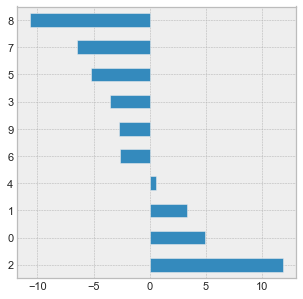

In [63]:
feat_importances = pd.Series(ridge.coef_ , index=np.argsort(ridge.coef_))
feat_importances.nlargest(10).plot(kind='barh')

##### Regularized LASSO model 

In [64]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [ 3.44641316 -8.62404732  0.95717933 -3.68619954 -5.12422856 -1.97983695
 11.08141254 -0.         -1.67440723 -2.40476103]


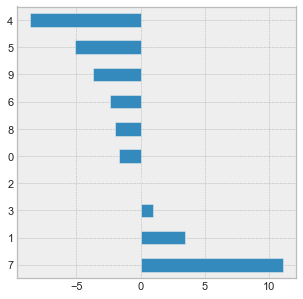

In [65]:
feat_importances = pd.Series(lasso.coef_ , index=np.argsort(lasso.coef_))
feat_importances.nlargest(10).plot(kind='barh')

##### Comparison of scores from various models 

In [66]:
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.7928045769555672
0.7640218912848987


In [67]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7927981832366525
0.76404140886895


In [68]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7889423345473894
0.7650508030146221


In [69]:
y_pred_ridge = ridge.predict(X_test)
mape = np.mean(np.abs(percentage_error(np.asarray(y_test), np.asarray(y_pred_ridge)))) * 100
vs = explained_variance_score(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred_ridge)

print('Explained Variance Score:%f' % vs)
print('MAE:%f' % mae)
print('MSE:%f' % mse)
print('RMSE:%f' % rmse)
print('R2:%f' % r2) 
print('MAPE:%f%%' % mape)


Explained Variance Score:0.765130
MAE:6.359682
MSE:62.095049
RMSE:7.880041
R2:0.764041
MAPE:21.599857%


In [70]:
y_pred_lasso = lasso.predict(X_test)
mape = np.mean(np.abs(percentage_error(np.asarray(y_test), np.asarray(y_pred_lasso)))) * 100
vs = explained_variance_score(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)

print('Explained Variance Score:%f' % vs)
print('MAE:%f' % mae)
print('MSE:%f' % mse)
print('RMSE:%f' % rmse)
print('R2:%f' % r2) 
print('MAPE:%f%%' % mape)


Explained Variance Score:0.765806
MAE:6.337220
MSE:61.829416
RMSE:7.863168
R2:0.765051
MAPE:21.175982%


##### Conclusion on RIDGE, LASSO and XGB models on Linear Data 

1. Ridge and Lasso models do not bring about any significant improvement in the accuracy. 

2. However boosted tree algorithm (XGB regressor) gave significantly higher results. 

3. All these models can be tried again after applying them on the data subjected to polynomical transformation. 


#### Apply Polynomial (Quadratic) Transformation  

In [71]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [72]:
X_poly = poly.fit_transform(X_std_df)
X_train, X_test, y_train, y_test = train_test_split(X_poly, Concrete_df_new_y, test_size=0.20, random_state=365)
X_train.shape

(824, 56)

In [73]:
# Fitting a simple non regularized linear model on poly features
reg_poly = LinearRegression()
reg_poly.fit(X_train, y_train)
print(reg_poly.coef_)

[ 2.42469228e-15  6.12988678e+12  3.11385887e+12  2.21341681e+00
 -1.81198431e+12 -1.86842740e+12  1.25960294e+00  9.96475363e+00
  9.90038374e+11  5.67594102e+12 -2.90722656e+00  6.65771484e-01
 -5.34777832e+00  2.22100830e+00  2.67529297e+00  1.70277405e+00
 -2.59179688e+00  3.27675136e+13 -2.88126324e+13 -3.31494141e+00
  4.78466797e+00 -2.75279236e+00 -2.34497070e+00  4.79638672e+00
 -5.58258057e+00 -2.25244141e+00  9.78422650e+12 -4.54252243e+00
 -2.56008911e+00 -1.85412598e+00  3.44799805e+00 -2.07171631e+00
 -2.21018677e+01  1.50441895e+01 -3.68225098e+00  1.54296875e+00
  3.12377930e+00 -1.76672363e+00 -3.88077155e+12 -1.68261719e+00
  2.01416016e+00  2.96423340e+00 -2.78576660e+00 -4.00165711e+12
 -3.82464600e+00  2.49316406e+00 -3.89404297e-01  3.11676025e+00
 -6.88842773e-01  4.74353027e+00  1.95007324e+00 -3.96875000e+00
 -2.74621582e+00 -2.72436523e+00  1.20500488e+01 -1.21795044e+01]


In [74]:
# Fitting Ridge model on poly features
ridge_poly = Ridge(alpha=.3)
ridge_poly.fit(X_train,y_train)
print ("Ridge model:", (ridge_poly.coef_))

Ridge model: [  0.           1.13421088  -6.4174794    2.44275064  -3.58386779
  -4.38739551   0.96189711  10.12675544  -1.99923318  -1.33387285
  -3.04934364   0.45403477  -5.66118138   1.89732819   2.3251399
   1.6629824   -2.59202308  -1.50078292  -1.33723661  -3.04592084
   4.00712419  -2.0702811   -1.97749488   4.64652973  -5.27554533
  -2.39643763   4.64115635  -3.6663332   -1.76165733  -1.35288989
   3.59458258  -2.14210174 -18.3551458   10.99163839  -3.25768348
   1.5042312    3.23331688  -1.92077981   1.5600795   -0.76915829
   1.8019474    2.78799236  -2.66448317   5.20254351  -3.23189767
   2.21466469  -0.32507745   3.2412476   -0.7263252    4.26193485
   1.29053085  -3.42910134  -2.46946853  -2.57374837   9.67523247
  -9.84792822]


In [75]:
print(ridge_poly.score(X_train, y_train))
print(ridge_poly.score(X_test, y_test))

0.866419654154248
0.8317477563758575


In [76]:
print("Ridge picked " + str(sum(ridge_poly.coef_ != 0)) + " variables and eliminated the other " +  str(sum(ridge_poly.coef_ == 0)) + " variables")

Ridge picked 55 variables and eliminated the other 1 variables


In [77]:
# Fitting Lasso model on poly features
lasso_poly = Lasso(alpha=0.2)
lasso_poly.fit(X_train,y_train)
print ("Lasso model:", (lasso_poly.coef_))

Lasso model: [ 0.00000000e+00  3.44328251e+00 -7.32055908e+00  1.14828227e+00
 -3.28304990e+00 -4.71308394e+00  0.00000000e+00  1.03070588e+01
 -0.00000000e+00 -2.12942156e+00 -1.26538012e+00 -0.00000000e+00
 -2.54316480e+00  5.56002275e-01 -0.00000000e+00 -7.92258230e-01
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  3.51950969e-01 -3.25912752e-01 -0.00000000e+00  0.00000000e+00
 -9.95374690e-01  0.00000000e+00  1.31771383e+00  0.00000000e+00
  2.24889579e-01  0.00000000e+00  4.02079795e-01  0.00000000e+00
 -2.13224974e+00 -0.00000000e+00 -2.85171099e+00  7.00126786e-01
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  5.20121322e-01 -0.00000000e+00 -6.70973744e-01  0.00000000e+00
  0.00000000e+00  7.47575237e-01 -4.84156054e-01  7.91549184e-01
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -4.46392274e-01
 -4.63691098e-02  0.00000000e+00 -1.50576363e-01 -3.19810134e-03]


In [78]:
print(lasso_poly.score(X_train, y_train))
print(lasso_poly.score(X_test, y_test))

0.8386409114472065
0.80889952366285


In [79]:
print("Lasso picked " + str(sum(lasso_poly.coef_ != 0)) + " variables and eliminated the other " +  str(sum(lasso_poly.coef_ == 0)) + " variables")

Lasso picked 29 variables and eliminated the other 27 variables


In [80]:
y_pred_reg_poly = reg_poly.predict(X_test)
mape = np.mean(np.abs(percentage_error(np.asarray(y_test), np.asarray(y_pred_reg_poly)))) * 100
vs = explained_variance_score(y_test, y_pred_reg_poly)
mae = mean_absolute_error(y_test, y_pred_reg_poly)
mse = mean_squared_error(y_test, y_pred_reg_poly)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred_reg_poly)

print('Explained Variance Score:%f' % vs)
print('MAE:%f' % mae)
print('MSE:%f' % mse)
print('RMSE:%f' % rmse)
print('R2:%f' % r2) 
print('MAPE:%f%%' % mape)

Explained Variance Score:0.834625
MAE:5.031184
MSE:44.022462
RMSE:6.634943
R2:0.832716
MAPE:16.471072%


In [81]:
y_pred_ridge_poly = ridge_poly.predict(X_test)
mape = np.mean(np.abs(percentage_error(np.asarray(y_test), np.asarray(y_pred_ridge_poly)))) * 100
vs = explained_variance_score(y_test, y_pred_ridge_poly)
mae = mean_absolute_error(y_test, y_pred_ridge_poly)
mse = mean_squared_error(y_test, y_pred_ridge_poly)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred_ridge_poly)

print('Explained Variance Score:%f' % vs)
print('MAE:%f' % mae)
print('MSE:%f' % mse)
print('RMSE:%f' % rmse)
print('R2:%f' % r2) 
print('MAPE:%f%%' % mape)

Explained Variance Score:0.833438
MAE:5.044422
MSE:44.277393
RMSE:6.654126
R2:0.831748
MAPE:16.303812%


In [82]:
y_pred_lasso_poly = lasso_poly.predict(X_test)
mape = np.mean(np.abs(percentage_error(np.asarray(y_test), np.asarray(y_pred_lasso_poly)))) * 100
vs = explained_variance_score(y_test, y_pred_lasso_poly)
mae = mean_absolute_error(y_test, y_pred_lasso_poly)
mse = mean_squared_error(y_test, y_pred_lasso_poly)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso_poly)

print('Explained Variance Score:%f' % vs)
print('MAE:%f' % mae)
print('MSE:%f' % mse)
print('RMSE:%f' % rmse)
print('R2:%f' % r2) 
print('MAPE:%f%%' % mape)

Explained Variance Score:0.809844
MAE:5.575256
MSE:50.290152
RMSE:7.091555
R2:0.808900
MAPE:17.762663%


##### XGB Grid Search on Polynomial   

In [84]:
param_grid_poly = [    {'n_estimators': [400, 500, 600], 
                   'learning_rate': [0.09, 0.095, 0.1, 0.0105, 0.11], 
                   'max_depth': [1, 2, 3, 4, 5], 
                   'objective': ['reg:squarederror']}    ]

In [85]:
xgbgrid_poly = GridSearchCV(xgb.XGBRegressor(), param_grid_poly, refit=True, verbose=3)
xgbgrid_poly.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] learning_rate=0.09, max_depth=1, n_estimators=400, objective=reg:squarederror 
[CV]  learning_rate=0.09, max_depth=1, n_estimators=400, objective=reg:squarederror, score=0.862, total=   0.2s
[CV] learning_rate=0.09, max_depth=1, n_estimators=400, objective=reg:squarederror 
[CV]  learning_rate=0.09, max_depth=1, n_estimators=400, objective=reg:squarederror, score=0.847, total=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] learning_rate=0.09, max_depth=1, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=1, n_estimators=400, objective=reg:squarederror, score=0.850, total=   0.2s
[CV] learning_rate=0.09, max_depth=1, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=1, n_estimators=500, objective=reg:squarederror, score=0.868, total=   0.3s
[CV] learning_rate=0.09, max_depth=1, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=1, n_estimators=500, objective=reg:squarederror, score=0.853, total=   0.3s
[CV] learning_rate=0.09, max_depth=1, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=1, n_estimators=500, objective=reg:squarederror, score=0.859, total=   0.3s
[CV] learning_rate=0.09, max_depth=1, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=1, n_estimators=600, objective=reg:squarederror, score=0.874, total=   0.3s
[CV] learning_rate=0.09, max_depth=1, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=1, n_estimators=600, objective=reg:squarederror, score=0.858, total=   0.3s
[CV] learning_rate=0.09, max_depth=1, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=1, n_estimators=600, objective=reg:squarederror, score=0.865, total=   0.3s
[CV] learning_rate=0.09, max_depth=2, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=2, n_estimators=400, objective=reg:squarederror, score=0.901, total=   0.4s
[CV] learning_rate=0.09, max_depth=2, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=2, n_estimators=400, objective=reg:squarederror, score=0.887, total=   0.4s
[CV] learning_rate=0.09, max_depth=2, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=2, n_estimators=400, objective=reg:squarederror, score=0.901, total=   0.4s
[CV] learning_rate=0.09, max_depth=2, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=2, n_estimators=500, objective=reg:squarederror, score=0.907, total=   0.5s
[CV] learning_rate=0.09, max_depth=2, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=2, n_estimators=500, objective=reg:squarederror, score=0.890, total=   0.5s
[CV] learning_rate=0.09, max_depth=2, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=2, n_estimators=500, objective=reg:squarederror, score=0.907, total=   0.5s
[CV] learning_rate=0.09, max_depth=2, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=2, n_estimators=600, objective=reg:squarederror, score=0.910, total=   0.6s
[CV] learning_rate=0.09, max_depth=2, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=2, n_estimators=600, objective=reg:squarederror, score=0.891, total=   0.6s
[CV] learning_rate=0.09, max_depth=2, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=2, n_estimators=600, objective=reg:squarederror, score=0.910, total=   0.6s
[CV] learning_rate=0.09, max_depth=3, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=3, n_estimators=400, objective=reg:squarederror, score=0.918, total=   0.6s
[CV] learning_rate=0.09, max_depth=3, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=3, n_estimators=400, objective=reg:squarederror, score=0.888, total=   0.6s
[CV] learning_rate=0.09, max_depth=3, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=3, n_estimators=400, objective=reg:squarederror, score=0.914, total=   0.6s
[CV] learning_rate=0.09, max_depth=3, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=3, n_estimators=500, objective=reg:squarederror, score=0.920, total=   0.7s
[CV] learning_rate=0.09, max_depth=3, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=3, n_estimators=500, objective=reg:squarederror, score=0.888, total=   0.8s
[CV] learning_rate=0.09, max_depth=3, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=3, n_estimators=500, objective=reg:squarederror, score=0.914, total=   0.8s
[CV] learning_rate=0.09, max_depth=3, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=3, n_estimators=600, objective=reg:squarederror, score=0.920, total=   0.9s
[CV] learning_rate=0.09, max_depth=3, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=3, n_estimators=600, objective=reg:squarederror, score=0.889, total=   0.9s
[CV] learning_rate=0.09, max_depth=3, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=3, n_estimators=600, objective=reg:squarederror, score=0.915, total=   0.9s
[CV] learning_rate=0.09, max_depth=4, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=4, n_estimators=400, objective=reg:squarederror, score=0.919, total=   0.8s
[CV] learning_rate=0.09, max_depth=4, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=4, n_estimators=400, objective=reg:squarederror, score=0.893, total=   0.8s
[CV] learning_rate=0.09, max_depth=4, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=4, n_estimators=400, objective=reg:squarederror, score=0.911, total=   0.8s
[CV] learning_rate=0.09, max_depth=4, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=4, n_estimators=500, objective=reg:squarederror, score=0.920, total=   1.0s
[CV] learning_rate=0.09, max_depth=4, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=4, n_estimators=500, objective=reg:squarederror, score=0.893, total=   1.0s
[CV] learning_rate=0.09, max_depth=4, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=4, n_estimators=500, objective=reg:squarederror, score=0.912, total=   1.0s
[CV] learning_rate=0.09, max_depth=4, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=4, n_estimators=600, objective=reg:squarederror, score=0.920, total=   1.2s
[CV] learning_rate=0.09, max_depth=4, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=4, n_estimators=600, objective=reg:squarederror, score=0.893, total=   1.2s
[CV] learning_rate=0.09, max_depth=4, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=4, n_estimators=600, objective=reg:squarederror, score=0.912, total=   1.2s
[CV] learning_rate=0.09, max_depth=5, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=5, n_estimators=400, objective=reg:squarederror, score=0.916, total=   1.0s
[CV] learning_rate=0.09, max_depth=5, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=5, n_estimators=400, objective=reg:squarederror, score=0.892, total=   1.0s
[CV] learning_rate=0.09, max_depth=5, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=5, n_estimators=400, objective=reg:squarederror, score=0.911, total=   1.1s
[CV] learning_rate=0.09, max_depth=5, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=5, n_estimators=500, objective=reg:squarederror, score=0.916, total=   1.3s
[CV] learning_rate=0.09, max_depth=5, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=5, n_estimators=500, objective=reg:squarederror, score=0.892, total=   1.2s
[CV] learning_rate=0.09, max_depth=5, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=5, n_estimators=500, objective=reg:squarederror, score=0.911, total=   1.3s
[CV] learning_rate=0.09, max_depth=5, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=5, n_estimators=600, objective=reg:squarederror, score=0.916, total=   1.5s
[CV] learning_rate=0.09, max_depth=5, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=5, n_estimators=600, objective=reg:squarederror, score=0.892, total=   1.5s
[CV] learning_rate=0.09, max_depth=5, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.09, max_depth=5, n_estimators=600, objective=reg:squarederror, score=0.911, total=   1.6s
[CV] learning_rate=0.095, max_depth=1, n_estimators=400, objective=reg:squarederror 
[CV]  learning_rate=0.095, max_depth=1, n_estimators=400, objective=reg:squarederror, score=0.863, total=   0.2s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.095, max_depth=1, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=1, n_estimators=400, objective=reg:squarederror, score=0.846, total=   0.2s
[CV] learning_rate=0.095, max_depth=1, n_estimators=400, objective=reg:squarederror 
[CV]  learning_rate=0.095, max_depth=1, n_estimators=400, objective=reg:squarederror, score=0.854, total=   0.2s

C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] learning_rate=0.095, max_depth=1, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=1, n_estimators=500, objective=reg:squarederror, score=0.870, total=   0.3s
[CV] learning_rate=0.095, max_depth=1, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=1, n_estimators=500, objective=reg:squarederror, score=0.853, total=   0.3s
[CV] learning_rate=0.095, max_depth=1, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=1, n_estimators=500, objective=reg:squarederror, score=0.862, total=   0.3s
[CV] learning_rate=0.095, max_depth=1, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=1, n_estimators=600, objective=reg:squarederror, score=0.875, total=   0.3s
[CV] learning_rate=0.095, max_depth=1, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=1, n_estimators=600, objective=reg:squarederror, score=0.859, total=   0.3s
[CV] learning_rate=0.095, max_depth=1, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=1, n_estimators=600, objective=reg:squarederror, score=0.868, total=   0.3s
[CV] learning_rate=0.095, max_depth=2, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=2, n_estimators=400, objective=reg:squarederror, score=0.902, total=   0.4s
[CV] learning_rate=0.095, max_depth=2, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=2, n_estimators=400, objective=reg:squarederror, score=0.892, total=   0.4s
[CV] learning_rate=0.095, max_depth=2, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=2, n_estimators=400, objective=reg:squarederror, score=0.904, total=   0.4s
[CV] learning_rate=0.095, max_depth=2, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=2, n_estimators=500, objective=reg:squarederror, score=0.907, total=   0.5s
[CV] learning_rate=0.095, max_depth=2, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=2, n_estimators=500, objective=reg:squarederror, score=0.894, total=   0.5s
[CV] learning_rate=0.095, max_depth=2, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=2, n_estimators=500, objective=reg:squarederror, score=0.909, total=   0.5s
[CV] learning_rate=0.095, max_depth=2, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=2, n_estimators=600, objective=reg:squarederror, score=0.910, total=   0.6s
[CV] learning_rate=0.095, max_depth=2, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=2, n_estimators=600, objective=reg:squarederror, score=0.895, total=   0.6s
[CV] learning_rate=0.095, max_depth=2, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=2, n_estimators=600, objective=reg:squarederror, score=0.912, total=   0.6s
[CV] learning_rate=0.095, max_depth=3, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=3, n_estimators=400, objective=reg:squarederror, score=0.915, total=   0.6s
[CV] learning_rate=0.095, max_depth=3, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=3, n_estimators=400, objective=reg:squarederror, score=0.892, total=   0.6s
[CV] learning_rate=0.095, max_depth=3, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=3, n_estimators=400, objective=reg:squarederror, score=0.914, total=   0.6s
[CV] learning_rate=0.095, max_depth=3, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=3, n_estimators=500, objective=reg:squarederror, score=0.916, total=   0.7s
[CV] learning_rate=0.095, max_depth=3, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=3, n_estimators=500, objective=reg:squarederror, score=0.893, total=   0.8s
[CV] learning_rate=0.095, max_depth=3, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=3, n_estimators=500, objective=reg:squarederror, score=0.914, total=   0.8s
[CV] learning_rate=0.095, max_depth=3, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=3, n_estimators=600, objective=reg:squarederror, score=0.916, total=   0.9s
[CV] learning_rate=0.095, max_depth=3, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=3, n_estimators=600, objective=reg:squarederror, score=0.894, total=   0.9s
[CV] learning_rate=0.095, max_depth=3, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=3, n_estimators=600, objective=reg:squarederror, score=0.915, total=   0.9s
[CV] learning_rate=0.095, max_depth=4, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=4, n_estimators=400, objective=reg:squarederror, score=0.920, total=   0.8s
[CV] learning_rate=0.095, max_depth=4, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=4, n_estimators=400, objective=reg:squarederror, score=0.884, total=   0.8s
[CV] learning_rate=0.095, max_depth=4, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=4, n_estimators=400, objective=reg:squarederror, score=0.910, total=   0.8s
[CV] learning_rate=0.095, max_depth=4, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=4, n_estimators=500, objective=reg:squarederror, score=0.921, total=   1.0s
[CV] learning_rate=0.095, max_depth=4, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=4, n_estimators=500, objective=reg:squarederror, score=0.884, total=   1.0s
[CV] learning_rate=0.095, max_depth=4, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=4, n_estimators=500, objective=reg:squarederror, score=0.910, total=   1.0s
[CV] learning_rate=0.095, max_depth=4, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=4, n_estimators=600, objective=reg:squarederror, score=0.921, total=   1.3s
[CV] learning_rate=0.095, max_depth=4, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=4, n_estimators=600, objective=reg:squarederror, score=0.884, total=   1.2s
[CV] learning_rate=0.095, max_depth=4, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=4, n_estimators=600, objective=reg:squarederror, score=0.910, total=   1.2s
[CV] learning_rate=0.095, max_depth=5, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=5, n_estimators=400, objective=reg:squarederror, score=0.915, total=   1.1s
[CV] learning_rate=0.095, max_depth=5, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=5, n_estimators=400, objective=reg:squarederror, score=0.889, total=   1.0s
[CV] learning_rate=0.095, max_depth=5, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=5, n_estimators=400, objective=reg:squarederror, score=0.908, total=   1.0s
[CV] learning_rate=0.095, max_depth=5, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=5, n_estimators=500, objective=reg:squarederror, score=0.915, total=   1.3s
[CV] learning_rate=0.095, max_depth=5, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=5, n_estimators=500, objective=reg:squarederror, score=0.889, total=   1.2s
[CV] learning_rate=0.095, max_depth=5, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=5, n_estimators=500, objective=reg:squarederror, score=0.908, total=   1.3s
[CV] learning_rate=0.095, max_depth=5, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=5, n_estimators=600, objective=reg:squarederror, score=0.915, total=   1.5s
[CV] learning_rate=0.095, max_depth=5, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=5, n_estimators=600, objective=reg:squarederror, score=0.889, total=   1.6s
[CV] learning_rate=0.095, max_depth=5, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.095, max_depth=5, n_estimators=600, objective=reg:squarederror, score=0.909, total=   1.5s
[CV] learning_rate=0.1, max_depth=1, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=1, n_estimators=400, objective=reg:squarederror, score=0.865, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=1, n_estimators=400, objective=reg:squarederror, score=0.849, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimators=400, objective=reg:squarederror 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=400, objective=reg:squarederror, score=0.855, total=   0.2s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.1, max_depth=1, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, objective=reg:squarederror, score=0.872, total=   0.3s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, objective=reg:squarederror, score=0.855, total=   0.3s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, objective=reg:squarederror, score=0.863, total=   0.3s
[CV] learning_rate=0.1, max_depth=1, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=1, n_estimators=600, objective=reg:squarederror, score=0.876, total=   0.3s
[CV] learning_rate=0.1, max_depth=1, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=1, n_estimators=600, objective=reg:squarederror, score=0.861, total=   0.3s
[CV] learning_rate=0.1, max_depth=1, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=1, n_estimators=600, objective=reg:squarederror, score=0.870, total=   0.3s
[CV] learning_rate=0.1, max_depth=2, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=2, n_estimators=400, objective=reg:squarederror, score=0.904, total=   0.4s
[CV] learning_rate=0.1, max_depth=2, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=2, n_estimators=400, objective=reg:squarederror, score=0.895, total=   0.4s
[CV] learning_rate=0.1, max_depth=2, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=2, n_estimators=400, objective=reg:squarederror, score=0.903, total=   0.4s
[CV] learning_rate=0.1, max_depth=2, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=2, n_estimators=500, objective=reg:squarederror, score=0.908, total=   0.5s
[CV] learning_rate=0.1, max_depth=2, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=2, n_estimators=500, objective=reg:squarederror, score=0.897, total=   0.5s
[CV] learning_rate=0.1, max_depth=2, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=2, n_estimators=500, objective=reg:squarederror, score=0.908, total=   0.5s
[CV] learning_rate=0.1, max_depth=2, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=2, n_estimators=600, objective=reg:squarederror, score=0.911, total=   0.6s
[CV] learning_rate=0.1, max_depth=2, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=2, n_estimators=600, objective=reg:squarederror, score=0.898, total=   0.6s
[CV] learning_rate=0.1, max_depth=2, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=2, n_estimators=600, objective=reg:squarederror, score=0.910, total=   0.6s
[CV] learning_rate=0.1, max_depth=3, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=3, n_estimators=400, objective=reg:squarederror, score=0.918, total=   0.6s
[CV] learning_rate=0.1, max_depth=3, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=3, n_estimators=400, objective=reg:squarederror, score=0.892, total=   0.6s
[CV] learning_rate=0.1, max_depth=3, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=3, n_estimators=400, objective=reg:squarederror, score=0.915, total=   0.6s
[CV] learning_rate=0.1, max_depth=3, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=3, n_estimators=500, objective=reg:squarederror, score=0.919, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=3, n_estimators=500, objective=reg:squarederror, score=0.893, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=3, n_estimators=500, objective=reg:squarederror, score=0.916, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=3, n_estimators=600, objective=reg:squarederror, score=0.920, total=   1.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=3, n_estimators=600, objective=reg:squarederror, score=0.893, total=   0.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=3, n_estimators=600, objective=reg:squarederror, score=0.916, total=   0.9s
[CV] learning_rate=0.1, max_depth=4, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=4, n_estimators=400, objective=reg:squarederror, score=0.921, total=   0.8s
[CV] learning_rate=0.1, max_depth=4, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=4, n_estimators=400, objective=reg:squarederror, score=0.896, total=   0.8s
[CV] learning_rate=0.1, max_depth=4, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=4, n_estimators=400, objective=reg:squarederror, score=0.914, total=   0.8s
[CV] learning_rate=0.1, max_depth=4, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=4, n_estimators=500, objective=reg:squarederror, score=0.921, total=   1.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=4, n_estimators=500, objective=reg:squarederror, score=0.896, total=   1.0s
[CV] learning_rate=0.1, max_depth=4, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=4, n_estimators=500, objective=reg:squarederror, score=0.915, total=   1.0s
[CV] learning_rate=0.1, max_depth=4, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=4, n_estimators=600, objective=reg:squarederror, score=0.921, total=   1.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=4, n_estimators=600, objective=reg:squarederror, score=0.896, total=   1.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=4, n_estimators=600, objective=reg:squarederror, score=0.915, total=   1.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=5, n_estimators=400, objective=reg:squarederror, score=0.912, total=   1.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=5, n_estimators=400, objective=reg:squarederror, score=0.896, total=   1.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=5, n_estimators=400, objective=reg:squarederror, score=0.911, total=   1.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, objective=reg:squarederror, score=0.912, total=   1.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, objective=reg:squarederror, score=0.896, total=   1.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, objective=reg:squarederror, score=0.911, total=   1.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=5, n_estimators=600, objective=reg:squarederror, score=0.912, total=   1.5s
[CV] learning_rate=0.1, max_depth=5, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=5, n_estimators=600, objective=reg:squarederror, score=0.896, total=   1.5s
[CV] learning_rate=0.1, max_depth=5, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.1, max_depth=5, n_estimators=600, objective=reg:squarederror, score=0.911, total=   1.5s
[CV] learning_rate=0.0105, max_depth=1, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=1, n_estimators=400, objective=reg:squarederror, score=0.686, total=   0.2s
[CV] learning_rate=0.0105, max_depth=1, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=1, n_estimators=400, objective=reg:squarederror, score=0.675, total=   0.2s
[CV] learning_rate=0.0105, max_depth=1, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=1, n_estimators=400, objective=reg:squarederror, score=0.675, total=   0.2s
[CV] learning_rate=0.0105, max_depth=1, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=1, n_estimators=500, objective=reg:squarederror, score=0.728, total=   0.3s
[CV] learning_rate=0.0105, max_depth=1, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=1, n_estimators=500, objective=reg:squarederror, score=0.714, total=   0.3s
[CV] learning_rate=0.0105, max_depth=1, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=1, n_estimators=500, objective=reg:squarederror, score=0.714, total=   0.3s
[CV] learning_rate=0.0105, max_depth=1, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=1, n_estimators=600, objective=reg:squarederror, score=0.754, total=   0.3s
[CV] learning_rate=0.0105, max_depth=1, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=1, n_estimators=600, objective=reg:squarederror, score=0.740, total=   0.3s
[CV] learning_rate=0.0105, max_depth=1, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=1, n_estimators=600, objective=reg:squarederror, score=0.740, total=   0.3s
[CV] learning_rate=0.0105, max_depth=2, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=2, n_estimators=400, objective=reg:squarederror, score=0.806, total=   0.4s
[CV] learning_rate=0.0105, max_depth=2, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=2, n_estimators=400, objective=reg:squarederror, score=0.799, total=   0.4s
[CV] learning_rate=0.0105, max_depth=2, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=2, n_estimators=400, objective=reg:squarederror, score=0.794, total=   0.4s
[CV] learning_rate=0.0105, max_depth=2, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=2, n_estimators=500, objective=reg:squarederror, score=0.823, total=   0.5s
[CV] learning_rate=0.0105, max_depth=2, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=2, n_estimators=500, objective=reg:squarederror, score=0.820, total=   0.5s
[CV] learning_rate=0.0105, max_depth=2, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=2, n_estimators=500, objective=reg:squarederror, score=0.812, total=   0.5s
[CV] learning_rate=0.0105, max_depth=2, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=2, n_estimators=600, objective=reg:squarederror, score=0.836, total=   0.6s
[CV] learning_rate=0.0105, max_depth=2, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=2, n_estimators=600, objective=reg:squarederror, score=0.832, total=   0.6s
[CV] learning_rate=0.0105, max_depth=2, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=2, n_estimators=600, objective=reg:squarederror, score=0.824, total=   0.6s
[CV] learning_rate=0.0105, max_depth=3, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=3, n_estimators=400, objective=reg:squarederror, score=0.852, total=   0.6s
[CV] learning_rate=0.0105, max_depth=3, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=3, n_estimators=400, objective=reg:squarederror, score=0.843, total=   0.5s
[CV] learning_rate=0.0105, max_depth=3, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=3, n_estimators=400, objective=reg:squarederror, score=0.839, total=   0.6s
[CV] learning_rate=0.0105, max_depth=3, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=3, n_estimators=500, objective=reg:squarederror, score=0.865, total=   0.7s
[CV] learning_rate=0.0105, max_depth=3, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=3, n_estimators=500, objective=reg:squarederror, score=0.859, total=   0.7s
[CV] learning_rate=0.0105, max_depth=3, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=3, n_estimators=500, objective=reg:squarederror, score=0.852, total=   0.7s
[CV] learning_rate=0.0105, max_depth=3, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=3, n_estimators=600, objective=reg:squarederror, score=0.873, total=   0.9s
[CV] learning_rate=0.0105, max_depth=3, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=3, n_estimators=600, objective=reg:squarederror, score=0.866, total=   0.8s
[CV] learning_rate=0.0105, max_depth=3, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=3, n_estimators=600, objective=reg:squarederror, score=0.862, total=   0.8s
[CV] learning_rate=0.0105, max_depth=4, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=4, n_estimators=400, objective=reg:squarederror, score=0.883, total=   0.7s
[CV] learning_rate=0.0105, max_depth=4, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=4, n_estimators=400, objective=reg:squarederror, score=0.863, total=   0.7s
[CV] learning_rate=0.0105, max_depth=4, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=4, n_estimators=400, objective=reg:squarederror, score=0.861, total=   0.8s
[CV] learning_rate=0.0105, max_depth=4, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=4, n_estimators=500, objective=reg:squarederror, score=0.892, total=   1.0s
[CV] learning_rate=0.0105, max_depth=4, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=4, n_estimators=500, objective=reg:squarederror, score=0.870, total=   1.0s
[CV] learning_rate=0.0105, max_depth=4, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=4, n_estimators=500, objective=reg:squarederror, score=0.873, total=   1.0s
[CV] learning_rate=0.0105, max_depth=4, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=4, n_estimators=600, objective=reg:squarederror, score=0.896, total=   1.2s
[CV] learning_rate=0.0105, max_depth=4, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=4, n_estimators=600, objective=reg:squarederror, score=0.874, total=   1.1s
[CV] learning_rate=0.0105, max_depth=4, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=4, n_estimators=600, objective=reg:squarederror, score=0.880, total=   1.1s
[CV] learning_rate=0.0105, max_depth=5, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=5, n_estimators=400, objective=reg:squarederror, score=0.892, total=   0.9s
[CV] learning_rate=0.0105, max_depth=5, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=5, n_estimators=400, objective=reg:squarederror, score=0.875, total=   0.9s
[CV] learning_rate=0.0105, max_depth=5, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=5, n_estimators=400, objective=reg:squarederror, score=0.881, total=   0.9s
[CV] learning_rate=0.0105, max_depth=5, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=5, n_estimators=500, objective=reg:squarederror, score=0.899, total=   1.2s
[CV] learning_rate=0.0105, max_depth=5, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=5, n_estimators=500, objective=reg:squarederror, score=0.883, total=   1.2s
[CV] learning_rate=0.0105, max_depth=5, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=5, n_estimators=500, objective=reg:squarederror, score=0.891, total=   1.2s
[CV] learning_rate=0.0105, max_depth=5, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=5, n_estimators=600, objective=reg:squarederror, score=0.902, total=   1.4s
[CV] learning_rate=0.0105, max_depth=5, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=5, n_estimators=600, objective=reg:squarederror, score=0.886, total=   1.4s
[CV] learning_rate=0.0105, max_depth=5, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.0105, max_depth=5, n_estimators=600, objective=reg:squarederror, score=0.896, total=   1.4s
[CV] learning_rate=0.11, max_depth=1, n_estimators=400, objective=reg:squarederror 
[CV]  learning_rate=0.11, max_depth=1, n_estimators=400, objective=reg:squarederror, score=0.867, total=   0.2s


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] learning_rate=0.11, max_depth=1, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=1, n_estimators=400, objective=reg:squarederror, score=0.852, total=   0.2s
[CV] learning_rate=0.11, max_depth=1, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=1, n_estimators=400, objective=reg:squarederror, score=0.860, total=   0.2s
[CV] learning_rate=0.11, max_depth=1, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=1, n_estimators=500, objective=reg:squarederror, score=0.874, total=   0.3s
[CV] learning_rate=0.11, max_depth=1, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=1, n_estimators=500, objective=reg:squarederror, score=0.859, total=   0.3s
[CV] learning_rate=0.11, max_depth=1, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=1, n_estimators=500, objective=reg:squarederror, score=0.868, total=   0.3s
[CV] learning_rate=0.11, max_depth=1, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=1, n_estimators=600, objective=reg:squarederror, score=0.879, total=   0.3s
[CV] learning_rate=0.11, max_depth=1, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=1, n_estimators=600, objective=reg:squarederror, score=0.863, total=   0.3s
[CV] learning_rate=0.11, max_depth=1, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=1, n_estimators=600, objective=reg:squarederror, score=0.874, total=   0.3s
[CV] learning_rate=0.11, max_depth=2, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=2, n_estimators=400, objective=reg:squarederror, score=0.906, total=   0.4s
[CV] learning_rate=0.11, max_depth=2, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=2, n_estimators=400, objective=reg:squarederror, score=0.892, total=   0.4s
[CV] learning_rate=0.11, max_depth=2, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=2, n_estimators=400, objective=reg:squarederror, score=0.910, total=   0.4s
[CV] learning_rate=0.11, max_depth=2, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=2, n_estimators=500, objective=reg:squarederror, score=0.910, total=   0.5s
[CV] learning_rate=0.11, max_depth=2, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=2, n_estimators=500, objective=reg:squarederror, score=0.895, total=   0.5s
[CV] learning_rate=0.11, max_depth=2, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=2, n_estimators=500, objective=reg:squarederror, score=0.914, total=   0.5s
[CV] learning_rate=0.11, max_depth=2, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=2, n_estimators=600, objective=reg:squarederror, score=0.912, total=   0.6s
[CV] learning_rate=0.11, max_depth=2, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=2, n_estimators=600, objective=reg:squarederror, score=0.895, total=   0.6s
[CV] learning_rate=0.11, max_depth=2, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=2, n_estimators=600, objective=reg:squarederror, score=0.915, total=   0.6s
[CV] learning_rate=0.11, max_depth=3, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=3, n_estimators=400, objective=reg:squarederror, score=0.921, total=   0.6s
[CV] learning_rate=0.11, max_depth=3, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=3, n_estimators=400, objective=reg:squarederror, score=0.892, total=   0.6s
[CV] learning_rate=0.11, max_depth=3, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=3, n_estimators=400, objective=reg:squarederror, score=0.914, total=   0.6s
[CV] learning_rate=0.11, max_depth=3, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=3, n_estimators=500, objective=reg:squarederror, score=0.922, total=   0.8s
[CV] learning_rate=0.11, max_depth=3, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=3, n_estimators=500, objective=reg:squarederror, score=0.892, total=   0.7s
[CV] learning_rate=0.11, max_depth=3, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=3, n_estimators=500, objective=reg:squarederror, score=0.914, total=   0.7s
[CV] learning_rate=0.11, max_depth=3, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=3, n_estimators=600, objective=reg:squarederror, score=0.922, total=   0.9s
[CV] learning_rate=0.11, max_depth=3, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=3, n_estimators=600, objective=reg:squarederror, score=0.892, total=   0.9s
[CV] learning_rate=0.11, max_depth=3, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=3, n_estimators=600, objective=reg:squarederror, score=0.915, total=   0.9s
[CV] learning_rate=0.11, max_depth=4, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=4, n_estimators=400, objective=reg:squarederror, score=0.920, total=   0.8s
[CV] learning_rate=0.11, max_depth=4, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=4, n_estimators=400, objective=reg:squarederror, score=0.881, total=   0.8s
[CV] learning_rate=0.11, max_depth=4, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=4, n_estimators=400, objective=reg:squarederror, score=0.914, total=   0.8s
[CV] learning_rate=0.11, max_depth=4, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=4, n_estimators=500, objective=reg:squarederror, score=0.921, total=   1.0s
[CV] learning_rate=0.11, max_depth=4, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=4, n_estimators=500, objective=reg:squarederror, score=0.881, total=   1.0s
[CV] learning_rate=0.11, max_depth=4, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=4, n_estimators=500, objective=reg:squarederror, score=0.914, total=   1.0s
[CV] learning_rate=0.11, max_depth=4, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=4, n_estimators=600, objective=reg:squarederror, score=0.921, total=   1.2s
[CV] learning_rate=0.11, max_depth=4, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=4, n_estimators=600, objective=reg:squarederror, score=0.881, total=   1.2s
[CV] learning_rate=0.11, max_depth=4, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=4, n_estimators=600, objective=reg:squarederror, score=0.914, total=   1.2s
[CV] learning_rate=0.11, max_depth=5, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=5, n_estimators=400, objective=reg:squarederror, score=0.918, total=   1.0s
[CV] learning_rate=0.11, max_depth=5, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=5, n_estimators=400, objective=reg:squarederror, score=0.891, total=   1.0s
[CV] learning_rate=0.11, max_depth=5, n_estimators=400, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=5, n_estimators=400, objective=reg:squarederror, score=0.909, total=   1.0s
[CV] learning_rate=0.11, max_depth=5, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=5, n_estimators=500, objective=reg:squarederror, score=0.918, total=   1.3s
[CV] learning_rate=0.11, max_depth=5, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=5, n_estimators=500, objective=reg:squarederror, score=0.891, total=   1.3s
[CV] learning_rate=0.11, max_depth=5, n_estimators=500, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=5, n_estimators=500, objective=reg:squarederror, score=0.909, total=   1.3s
[CV] learning_rate=0.11, max_depth=5, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=5, n_estimators=600, objective=reg:squarederror, score=0.918, total=   1.6s
[CV] learning_rate=0.11, max_depth=5, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=5, n_estimators=600, objective=reg:squarederror, score=0.891, total=   1.6s
[CV] learning_rate=0.11, max_depth=5, n_estimators=600, objective=reg:squarederror 


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  learning_rate=0.11, max_depth=5, n_estimators=600, objective=reg:squarederror, score=0.909, total=   1.6s


[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  2.8min finished
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid=[{'learning_rate': [0.09, 0.095, 0.1, 0.0105, 0.11],
                          'max_depth': [

In [86]:
xgbgrid_poly.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 600,
 'objective': 'reg:squarederror'}

In [87]:
y_pred_xgbmodelgrid_poly = xgbgrid_poly.predict(X_test)

mape = np.mean(np.abs(percentage_error(np.asarray(y_test), np.asarray(y_pred_xgbmodelgrid_poly)))) * 100
print('MAPE:%f%%' % mape)

vs = explained_variance_score(y_test, y_pred_xgbmodelgrid_poly)
mae = mean_absolute_error(y_test, y_pred_xgbmodelgrid_poly)
mse = mean_squared_error(y_test, y_pred_xgbmodelgrid_poly)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred_xgbmodelgrid_poly)

print('Explained Variance Score:%f' % vs)
print('MAE:%f' % mae)
print('MSE:%f' % mse)
print('RMSE:%f' % rmse)
print('R2:%f' % r2) 

MAPE:8.179147%
Explained Variance Score:0.939809
MAE:2.464516
MSE:15.868934
RMSE:3.983583
R2:0.939699


##### Model Performance Conclusion

1. Boosted Tree algorithm - XGB Regressor applied on Quadratic transformed features gave the best results in terms of all metrics. 

2. In general, all models including regularization worked better on Polynomial transformation, probably due to the non-linear 
relationship between the features. 